# Setup

In [136]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import unicodedata
import time
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

%config InlineBackend.figure_format = 'png'
plt.rcParams['figure.dpi']= 300

# Scrape Data

## Scrape Setup

In [3]:
year_list = [str(year) for year in list(range(2002,2018))]
url_list = [('https://www.baseball-reference.com/leagues/AL/' + year + '.shtml') 
            for year in year_list]

chromedriver = '/Users/kellyjones/Downloads/chromedriver' # path to the chromedriver executable
os.environ['webdriver.chrome.driver'] = chromedriver
driver = webdriver.Chrome(chromedriver)
driver.implicitly_wait(5)

## Pull Data from URLs by Year
Use table ID to pull batting, pitching, and fielding tables from each page, then quit driver.

In [4]:
# 2002
driver.get(url_list[0])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_02bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_02pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_02fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [5]:
#2003
driver.get(url_list[1])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_03bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_03pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_03fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [6]:
#2004
driver.get(url_list[2])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_04bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_04pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_04fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [7]:
#2005
driver.get(url_list[3])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_05bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_05pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_05fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [8]:
#2006
driver.get(url_list[4])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_06bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_06pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_06fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [9]:
#2007
driver.get(url_list[5])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_07bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_07pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_07fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [10]:
#2008
driver.get(url_list[6])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_08bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_08pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_08fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [11]:
#2009
driver.get(url_list[7])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_09bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_09pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_09fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [12]:
#2010
driver.get(url_list[8])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_10bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_10pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_10fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [13]:
#2011
driver.get(url_list[9])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_11bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_11pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_11fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [14]:
#2012
driver.get(url_list[10])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_12bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_12pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_12fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [15]:
#2013
driver.get(url_list[11])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_13bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_13pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_13fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [16]:
#2014
driver.get(url_list[12])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_14bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_14pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_14fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [17]:
#2015
driver.get(url_list[13])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_15bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_15pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_15fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [18]:
#2016
driver.get(url_list[14])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_16bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_16pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_16fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [19]:
#2017
driver.get(url_list[15])
soup = BeautifulSoup(driver.page_source, 'lxml')

table_17bat = soup.find('table', {'id' : 'teams_standard_batting'})
table_17pit = soup.find('table', {'id' : 'teams_standard_pitching'})
table_17fld = soup.find('table', {'id' : 'teams_standard_fielding'})

In [20]:
driver.quit()

# Parse Data

## Team Names

In scraped data, team names are hyperlinked and not easily scraped with other columns, so will be added back in with each year's dataframes.

In [21]:
# Team names by yr for DF (Angels and Rays changed team names, Astros joined division)
teams_list_02to04 = ['LAA', 'BAL', 'BOS', 'CHW', 'CLE', 'DET', 'KCR', 'MIN', 'NYY', 'OAK', 'SEA', 'TBD', 'TEX', 'TOR']
teams_list_05to12 = ['BAL', 'BOS', 'CHW', 'CLE', 'DET', 'KCR', 'LAA', 'MIN', 'NYY', 'OAK', 'SEA', 'TBD', 'TEX', 'TOR']
teams_list_13to17 = ['BAL', 'BOS', 'CHW', 'CLE', 'DET', 'HOU', 'KCR', 'LAA', 'MIN', 'NYY', 'OAK', 'SEA', 'TBD', 'TEX', 
                     'TOR']

## Variable Glossary

### Batting

**#Bat** -- Number of Players used in Games  
**BatAge** -- Batters’ average age, weighted by AB + Games Played  
**R/G** -- Runs Scored Per Game  
**G** -- Games Played or Pitched  
**PA** -- *Plate Appearances. When available, we use actual plate appearances from play-by-play game accounts. Otherwise estimated using AB + BB + HBP + SF + SH, which excludes catcher interferences.*  
**AB** -- At Bats  
**R** -- Runs Scored/Allowed  
**H** -- Hits/Hits Allowed  
**HR** -- Home Runs Hit/Allowed  
**RBI** -- Runs Batted In  
**SB** -- Stolen Bases  
**CS** -- Caught Stealing  
**BB** -- Bases on Balls/Walks  
**SO** -- Strikeouts  
**BA** -- Hits/At Bats  
**OBP** -- (H + BB + HBP)/(At Bats + BB + HBP + SF)  
**SLG** -- Total Bases/At Bats or (1B + 2x2B + 3x3B + 4xHR)/AB  
**OPS** -- On-Base + Slugging Percentages  
**OPS+** -- OPS+ *100x(OBP/lg OBP + SLG/lg SLG - 1), adjusted to the player’s ballpark(s)*  
**TB** -- Total Bases. *Singles + 2 x Doubles + 3 x Triples + 4 x Home Runs*  
**GDP** -- Double Plays Grounded Into. *Only includes standard 6-4-3, 4-3, etc. double plays. For gamelogs only in seasons we have play-by-play, we include triple plays as well. All official seasonal totals do not include GITP's.*  
**HBP** -- Times Hit by a Pitch.  
**SH** -- Sacrifice Hits (Sacrifice Bunts)  
**SF** -- Sacrifice Flies  
**IBB** -- Intentional Bases on Balls  
**LOB** -- Runners Left On Base

### Pitching

**#P** -- Number of Pitchers used in Games  
**PAge** -- Pitchers’ average age  
Weighted by 3*GS + G + SV  
RA/G -- Runs Allowed Per Game  
W -- Wins  
L -- Losses  
W-L% -- Win-Loss Percentage  
W / (W + L)  
For players, leaders need one decision for every ten team games.
For managers, minimum to qualify for leading is 320 games.  
ERA -- 9 * ER / IP  
For recent years, leaders need 1 IP
per team game played.
Bold indicates lowest ERA using current stats
Gold means awarded ERA title at end of year.  
G -- Games Played or Pitched  
GS -- Games Started  
GF -- Games Finished  
CG -- Complete Game  
tSho -- Shutouts by a team  
No runs allowed in a game by one or more pitchers.  
cSho -- Shutouts  
No runs allowed and a complete game.  
SV -- Saves  
IP -- Innings Pitched  
H -- Hits/Hits Allowed  
R -- Runs Scored/Allowed  
ER -- Earned Runs Allowed  
HR -- Home Runs Hit/Allowed  
BB -- Bases on Balls/Walks  
IBB -- Intentional Bases on Balls  
First tracked in 1955.  
SO -- Strikeouts  
HBP -- Times Hit by a Pitch.  
BK -- Balks  
WP -- Wild Pitches  
BF -- Batters Faced  
ERA+ -- ERA+  
100*[lgERA/ERA]  
Adjusted to the player’s ballpark(s).  
FIP -- Fielding Independent Pitching  
this stat measures a pitcher's effectiveness at preventing HR, BB, HBP and causing SO
(13*HR + 3*(BB+HBP) - 2*SO)/IP + Constantlg
The constant is set so that each season MLB average FIP is the same as the MLB avg ERA  
WHIP -- (BB + H)/IP  
For recent years, leaders need 1 IP
per team game played  
H9 -- 9 x H / IP  
For recent years, leaders need 1 IP
per team game played  
HR9 -- 9 x HR / IP  
For recent years, leaders need 1 IP
per team game played  
BB9 -- 9 x BB / IP  
For recent years, leaders need 1 IP
per team game played  
SO9 -- 9 x SO / IP  
For recent years, leaders need 1 IP
per team game played  
SO/W -- SO/W or SO/BB  
For recent years, pitching leaders need 1 IP
per team game played.  
No batting leaders computed.  
LOB -- Runners Left On Base  

### Fielding

**#Fld** -- Number of Players used as Fielders  
**RA/G** -- Runs Allowed Per Game  
**DefEff** -- Defensive Efficiency  
*Percentage of balls in play converted into outs. This is an estimate based on team defensive and pitching stats. We utilize two estimates of plays made. One using innings pitched, strikeouts, double plays and outfield assists. And the other with batters faced, strikeouts, hits allowed, walks allowed, hbp, and .71 x errors committed (avg percent of errors that result in an ROE) Total plays available are plays made + hits allowed - home runs + error committed estimate.*  
**G** -- Games Played or Pitched
GS -- Games Started  
CG -- Complete Game  
Inn -- Innings Played in Field  
Ch -- Defensive Chances  
*Putouts + Assists + Errors*  
PO -- Putouts  
A -- Assists  
E -- Errors Committed  
DP -- Double Plays Turned  
Fld% -- Fielding Percentage  
(Putouts + Assists) / (Putouts + Assists + Errors)
Rtot -- Total Zone Total Fielding Runs Above Avg
The number of runs above or below average the player was worth based on the number of plays made. This number combines the Rtz, Rdp, Rof, Rcatch numbers into a total defensive contribution.  
Rtot/yr -- Total Zone Total Fielding Runs Above Avg per 1,200 Inn  
The number of runs above or below average the fielder was worth per 1,200 Innings (approx 135 games).
This number combines the Rtz, Rdp, Rof, Rcatch numbers into a total defensive contribution.
See the glossary section for a more complete explanation.
Provided by BaseballProjection.com  
Rdrs -- BIS Defensive Runs Saved Above Avg  
The number of runs above or below average the player was worth based on the number of plays made.
This number combines the Rpm, Rbdp, Rbof, Rbcatch numbers into a total defensive contribution.
Provided by Baseball Info Solutions  
Rdrs/yr -- BIS Defensive Runs Saved Above Avg per 1,200 Inn  
The number of runs above or below average the fielder was worth per 1,200 Innings (approx 135 games).
This number combines the Rpm, Rbdp, Rbof, Rbcatch numbers into a total defensive contribution.
For pitchers, this is set to 200 Innings.

## Parse Tables by Year

* For column headers, skip first column with hyperlinked team names. 
* For data rows, skip first row (column headers) and last two rows (summary statistics). 
* Reset index after each year of data.
* List of teams changes in 2005 and 2013.

### Batting

In [22]:
# 2002 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_02bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_02bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_bat['Year'] = '2002'
df_bat['YrTm'] = df_bat['Year'] + df_bat['Team']
df_bat.shape # should be 14 rows

(14, 31)

In [23]:
# 2003 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_03bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_03bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_bat_interim['Year'] = '2003'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 28 rows

(28, 31)

In [24]:
# 2004 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_04bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_04bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_bat_interim['Year'] = '2004'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 42 rows

(42, 31)

In [25]:
# 2005 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_05bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_05bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_bat_interim['Year'] = '2005'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 56 rows

(56, 31)

In [26]:
# 2006 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_06bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_06bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_bat_interim['Year'] = '2006'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 70 rows

(70, 31)

In [27]:
# 2007 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_07bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_07bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_bat_interim['Year'] = '2007'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 84 rows

(84, 31)

In [28]:
# 2008 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_08bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_08bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_bat_interim['Year'] = '2008'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 98 rows

(98, 31)

In [29]:
# 2009 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_09bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_09bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_bat_interim['Year'] = '2009'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 112 rows

(112, 31)

In [30]:
# 2010 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_10bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_10bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_bat_interim['Year'] = '2010'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 126 rows

(126, 31)

In [31]:
# 2011 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_11bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_11bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_bat_interim['Year'] = '2011'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 140 rows

(140, 31)

In [32]:
# 2012 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_12bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_12bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_bat_interim['Year'] = '2012'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 154 rows

(154, 31)

In [33]:
# 2013 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_13bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_13bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_bat_interim['Year'] = '2013'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 169 rows

(169, 31)

In [34]:
# 2014 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_14bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_14bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_bat_interim['Year'] = '2014'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 184 rows

(184, 31)

In [35]:
# 2015 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_15bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_15bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_bat_interim['Year'] = '2015'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 199 rows

(199, 31)

In [36]:
# 2016 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_16bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_16bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_bat_interim['Year'] = '2016'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 214 rows

(214, 31)

In [37]:
# 2017 - Batting DF
col_headers_bat = [th.getText() for th in 
                  table_17bat.findAll('tr')[0].findAll('th')][1:]
data_rows_bat = table_17bat.findAll('tr')[1:-2] 
player_data_bat = [[td.getText() for td in data_rows_bat[i].findAll('td')]
               for i in range(len(data_rows_bat))]

df_bat_interim = pd.DataFrame(player_data_bat, columns=col_headers_bat)
df_bat_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_bat_interim['Year'] = '2017'
df_bat_interim['YrTm'] = df_bat_interim['Year'] + df_bat_interim['Team']
df_bat = pd.concat([df_bat, df_bat_interim]).reset_index(drop=True)
df_bat.shape # should be 229 rows

(229, 31)

In [38]:
df_bat.sample(10)

#Bat BatAge   R/G    G    PA    AB    R     H   2B  3B   ...       TB  \
171   44   27.7  4.07  162  6077  5543  660  1400  279  32   ...     2208   
67    49   27.3  4.25  162  6041  5474  689  1395  267  33   ...     2298   
76    42   28.6  5.07  162  6198  5554  822  1578  324  23   ...     2317   
221   55   30.0  4.38  162  6073  5415  710  1314  251  14   ...     2151   
143   48   27.8  4.12  162  6195  5525  667  1385  266  24   ...     2107   
210   54   30.5  4.74  162  6227  5583  768  1446  251  17   ...     2400   
204   43   26.4  4.47  162  6204  5545  724  1367  291  29   ...     2310   
30    50   30.4  5.86  162  6515  5720  949  1613  373  25   ...     2702   
181   43   29.3  3.78  162  6205  5516  612  1361  263  24   ...     2023   
167   46   29.6  4.48  163  6196  5585  730  1465  262  23   ...     2301   

     GDP HBP  SH  SF IBB   LOB Team  Year     YrTm  
171  127  60  19  38  33  1071  CHW  2014  2014CHW  
67   101  47  35  43  23  1038  TBD  2006  2006TBD  
76   146  40  32  65  55  1100  LAA  2007  2007LAA  
221  141  70  17  46  30  1033  LAA  2017  2017LAA  
143  141  59  17  39  28  1162  CLE  2012  2012CLE  
210  138  72  24  41  29  1099  SEA  2016  2016SEA  
204  134  47  27  31  31  1086  HOU  2016  2016HOU  
30   123  69  12  55  39  1257  BOS  2004  2004BOS  
181  135  66  43  53  31  1193  TBD  2014  2014TBD  
167  124  61  45  42  26  1110  TEX  2013  2013TEX  

[10 rows x 31 columns]

### Pitching

In [39]:
# 2002 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_02pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_02pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_pit['Year'] = '2002'
df_pit['YrTm'] = df_pit['Year'] + df_pit['Team']
df_pit.shape # should be 14 rows

(14, 38)

In [40]:
# 2003 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_03pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_03pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_pit_interim['Year'] = '2003'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 28 rows

(28, 38)

In [41]:
# 2004 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_04pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_04pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_pit_interim['Year'] = '2004'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 42 rows

(42, 38)

In [42]:
# 2005 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_05pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_05pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_pit_interim['Year'] = '2005'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 56 rows

(56, 38)

In [43]:
# 2006 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_06pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_06pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_pit_interim['Year'] = '2006'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 70 rows

(70, 38)

In [44]:
# 2007 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_07pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_07pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_pit_interim['Year'] = '2007'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 84 rows

(84, 38)

In [45]:
# 2008 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_08pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_08pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_pit_interim['Year'] = '2008'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 98 rows

(98, 38)

In [46]:
# 2009 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_09pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_09pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_pit_interim['Year'] = '2009'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 112 rows

(112, 38)

In [47]:
# 2010 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_10pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_10pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_pit_interim['Year'] = '2010'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 126 rows

(126, 38)

In [48]:
# 2011 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_11pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_11pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_pit_interim['Year'] = '2011'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 140 rows

(140, 38)

In [49]:
# 2012 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_12pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_12pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_pit_interim['Year'] = '2012'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 154 rows

(154, 38)

In [50]:
# 2013 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_13pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_13pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_pit_interim['Year'] = '2013'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 169 rows

(169, 38)

In [51]:
# 2014 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_14pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_14pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_pit_interim['Year'] = '2014'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 184 rows

(184, 38)

In [52]:
# 2015 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_15pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_15pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_pit_interim['Year'] = '2015'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 199 rows

(199, 38)

In [53]:
# 2016 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_16pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_16pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_pit_interim['Year'] = '2016'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 214 rows

(214, 38)

In [54]:
# 2017 - Pitching DF
col_headers_pit = [th.getText() for th in 
                  table_17pit.findAll('tr')[0].findAll('th')][1:]
data_rows_pit = table_17pit.findAll('tr')[1:-2] 
player_data_pit = [[td.getText() for td in data_rows_pit[i].findAll('td')]
               for i in range(len(data_rows_pit))]

df_pit_interim = pd.DataFrame(player_data_pit, columns=col_headers_pit)
df_pit_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_pit_interim['Year'] = '2017'
df_pit_interim['YrTm'] = df_pit_interim['Year'] + df_pit_interim['Team']
df_pit = pd.concat([df_pit, df_pit_interim]).reset_index(drop=True)
df_pit.shape # should be 229 rows

(229, 38)

In [55]:
df_pit.sample(10)

#P  PAge  RA/G   W    L  W-L%   ERA    G   GS   GF   ...      WHIP    H9  \
61   31  27.7  5.99  62  100  .383  5.65  162  162  159   ...     1.602  10.4   
183  27  29.6  4.23  83   79  .512  4.00  162  162  159   ...     1.310   8.7   
206  30  28.4  4.49  74   88  .457  4.28  162  162  158   ...     1.392   9.4   
102  23  26.6  4.57  86   77  .528  4.29  163  163  159   ...     1.412   9.0   
56   24  27.9  5.55  70   92  .432  5.35  162  162  157   ...     1.545  10.0   
45   17  29.2  3.96  93   69  .574  3.61  162  162  156   ...     1.223   8.4   
141  26  28.7  4.98  69   93  .426  4.70  162  162  156   ...     1.371   9.0   
189  24  29.4  3.81  86   76  .531  3.57  162  162  157   ...     1.201   8.2   
174  28  27.9  4.46  70   92  .432  4.11  162  162  155   ...     1.335   9.0   
108  20  27.4  4.27  85   77  .525  3.87  162  162  158   ...     1.303   8.4   

     HR9  BB9  SO9  SO/W   LOB Team  Year     YrTm  
61   1.3  4.0  5.7  1.42  1184  KCR  2006  2006KCR  
183  0.9  3.1  7.5  2.45  1135  TOR  2014  2014TOR  
206  1.3  3.2  7.2  2.28  1129  LAA  2016  2016LAA  
102  1.1  3.7  6.9  1.86  1154  DET  2009  2009DET  
56   1.4  3.9  6.4  1.66  1171  BAL  2006  2006BAL  
45   1.0  2.6  6.5  2.54  1048  CLE  2005  2005CLE  
141  1.2  3.3  7.3  2.22  1074  BOS  2012  2012BOS  
189  0.9  2.6  8.0  3.03  1024  HOU  2015  2015HOU  
174  0.9  3.0  7.1  2.35  1115  HOU  2014  2014HOU  
108  1.1  3.3  6.5  1.95  1109  SEA  2009  2009SEA  

[10 rows x 38 columns]

In [56]:
df_pit.head()

#P  PAge  RA/G   W   L  W-L%   ERA    G   GS   GF   ...      WHIP   H9  \
0  18  30.2  3.98  99  63  .611  3.69  162  162  155   ...     1.277  8.3   
1  20  27.8  4.77  67  95  .414  4.46  162  162  154   ...     1.406  9.3   
2  18  31.1  4.10  93  69  .574  3.75  162  162  157   ...     1.223  8.3   
3  16  25.8  4.93  81  81  .500  4.53  162  162  155   ...     1.370  9.0   
4  31  28.1  5.17  74  88  .457  4.91  162  162  153   ...     1.482  9.5   

   HR9  BB9  SO9  SO/W   LOB Team  Year     YrTm  
0  1.0  3.2  6.2  1.96  1096  LAA  2002  2002LAA  
1  1.3  3.4  6.0  1.76  1133  BAL  2002  2002BAL  
2  0.9  2.7  7.2  2.69  1046  BOS  2002  2002BOS  
3  1.2  3.3  6.0  1.79  1064  CHW  2002  2002CHW  
4  0.9  3.8  6.7  1.75  1160  CLE  2002  2002CLE  

[5 rows x 38 columns]

In [57]:
df_pit.tail()

#P  PAge  RA/G   W   L  W-L%   ERA    G   GS   GF   ...      WHIP   H9  \
224  28  27.9  5.10  75  87  .463  4.67  162  162  161   ...     1.360  9.1   
225  40  27.8  4.77  78  84  .481  4.46  162  162  161   ...     1.312  8.7   
226  30  27.6  4.35  80  82  .494  3.97  162  162  162   ...     1.264  8.2   
227  31  28.8  5.04  78  84  .481  4.66  162  162  160   ...     1.396  9.1   
228  33  28.8  4.84  76  86  .469  4.42  162  162  160   ...     1.371  9.0   

     HR9  BB9  SO9  SO/W   LOB Team  Year     YrTm  
224  1.3  3.2  7.6  2.39  1048  OAK  2017  2017OAK  
225  1.5  3.1  7.8  2.54  1039  SEA  2017  2017SEA  
226  1.2  3.1  8.4  2.69  1060  TBD  2017  2017TBD  
227  1.3  3.5  6.9  1.98  1092  TEX  2017  2017TEX  
228  1.2  3.4  8.4  2.50  1137  TOR  2017  2017TOR  

[5 rows x 38 columns]

### Fielding

In [58]:
# 2002 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_02fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_02fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_fld['Year'] = '2002'
df_fld['YrTm'] = df_fld['Year'] + df_fld['Team']
df_fld.shape # should be 14 rows

(14, 18)

In [59]:
# 2003 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_03fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_03fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_fld_interim['Year'] = '2003'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 28 rows

(28, 20)

Columns increased from 18 to 20 starting in 2003 because of addition of two stats:
* **Rdrs:** Defensive runs saved above average
* **Rdrs/yr:** Defensive runs saved above average per 1,200 innings (appx 135 games)

In [60]:
# 2004 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_04fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_04fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_02to04})
df_fld_interim['Year'] = '2004'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 42 rows

(42, 20)

In [61]:
# 2005 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_05fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_05fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_fld_interim['Year'] = '2005'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 56 rows

(56, 20)

In [62]:
# 2006 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_06fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_06fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_fld_interim['Year'] = '2006'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 70 rows

(70, 20)

In [63]:
# 2007 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_07fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_07fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_fld_interim['Year'] = '2007'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 84 rows

(84, 20)

In [64]:
# 2008 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_08fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_08fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_fld_interim['Year'] = '2008'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 98 rows

(98, 20)

In [65]:
# 2009 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_09fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_09fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_fld_interim['Year'] = '2009'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 112 rows

(112, 20)

In [66]:
# 2010 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_10fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_10fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_fld_interim['Year'] = '2010'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 126 rows

(126, 20)

In [67]:
# 2011 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_11fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_11fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_fld_interim['Year'] = '2011'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 140 rows

(140, 20)

In [68]:
# 2012 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_12fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_12fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_05to12})
df_fld_interim['Year'] = '2012'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 154 rows

(154, 20)

In [69]:
# 2013 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_13fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_13fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_fld_interim['Year'] = '2013'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 169 rows

(169, 20)

In [70]:
# 2014 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_14fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_14fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_fld_interim['Year'] = '2014'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 184 rows

(184, 20)

In [71]:
# 2015 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_15fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_15fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_fld_interim['Year'] = '2015'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 199 rows

(199, 20)

In [72]:
# 2016 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_16fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_16fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_fld_interim['Year'] = '2016'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 214 rows

(214, 20)

In [73]:
# 2017 - Fielding DF
col_headers_fld = [th.getText() for th in 
                  table_17fld.findAll('tr')[0].findAll('th')][1:]
data_rows_fld = table_17fld.findAll('tr')[1:-2] 
player_data_fld = [[td.getText() for td in data_rows_fld[i].findAll('td')]
               for i in range(len(data_rows_fld))]

df_fld_interim = pd.DataFrame(player_data_fld, columns=col_headers_fld)
df_fld_interim['Team'] = pd.DataFrame({'Team': teams_list_13to17})
df_fld_interim['Year'] = '2017'
df_fld_interim['YrTm'] = df_fld_interim['Year'] + df_fld_interim['Team']
df_fld = pd.concat([df_fld, df_fld_interim]).reset_index(drop=True)
df_fld.shape # should be 229 rows

(229, 20)

In [74]:
df_fld.head()

#Fld     A    CG    Ch   DP DefEff    E  Fld%    G    GS      Inn    PO  \
0   40  1575  1075  6020  151   .718   87  .986  162  1458  13071.0  4358   
1   46  1720  1165  6163  173   .701   91  .985  162  1458  13056.0  4352   
2   39  1645  1150  6087  140   .702  104  .983  162  1458  13014.0  4338   
3   35  1595  1168  5961  157   .706   97  .984  162  1458  12807.0  4269   
4   59  1662  1153  6049  161   .674  113  .981  162  1458  12822.0  4274   

   RA/G Rdrs Rdrs/yr Rtot Rtot/yr Team  Year     YrTm  
0  3.98  NaN     NaN   98       9  LAA  2002  2002LAA  
1  4.77  NaN     NaN   43       4  BAL  2002  2002BAL  
2  4.10  NaN     NaN   62       6  BOS  2002  2002BOS  
3  4.93  NaN     NaN   13       1  CHW  2002  2002CHW  
4  5.17  NaN     NaN  -49      -5  CLE  2002  2002CLE

In [75]:
df_fld.tail()

#Fld     A    CG    Ch   DP DefEff    E  Fld%    G    GS      Inn    PO  \
224   54  1597  1111  6011  162   .686  121  .980  162  1458  12879.0  4293   
225   61  1422  1154  5847  147   .700  103  .982  162  1458  12963.0  4322   
226   53  1433  1129  5868  129   .701  100  .983  162  1458  13005.0  4335   
227   51  1616  1131  6027  173   .695  108  .982  162  1458  12909.0  4303   
228   60  1570  1073  6057  145   .682   92  .985  162  1458  13185.0  4395   

     RA/G Rdrs Rdrs/yr Rtot Rtot/yr Team  Year     YrTm  
224  5.10  -48      -1  -41      -4  OAK  2017  2017OAK  
225  4.77    6       1   10       1  SEA  2017  2017SEA  
226  4.35   59       1   26       2  TBD  2017  2017TBD  
227  5.04   -1       0   50       5  TEX  2017  2017TEX  
228  4.84  -17      -2  -28      -3  TOR  2017  2017TOR

In [76]:
df_fld.sample(5)

#Fld     A    CG    Ch   DP DefEff    E  Fld%    G    GS      Inn    PO  \
194   52  1642  1105  6102  154   .691  126  .979  162  1458  13002.0  4334   
64    49  1593  1023  6028  145   .696  104  .983  162  1458  12993.0  4331   
149   50  1568  1174  6089  135   .704  111  .982  162  1458  13230.0  4410   
225   61  1422  1154  5847  147   .700  103  .982  162  1458  12963.0  4322   
206   53  1483  1058  5844  148   .685   97  .983  162  1458  12792.0  4264   

     RA/G Rdrs Rdrs/yr Rtot Rtot/yr Team  Year     YrTm  
194  4.50    5       0  -20      -2  OAK  2015  2015OAK  
64   4.73  -39      -1  -24      -2  NYY  2006  2006NYY  
149  3.79    5       0   20       2  OAK  2012  2012OAK  
225  4.77    6       1   10       1  SEA  2017  2017SEA  
206  4.49   31       0  -19      -2  LAA  2016  2016LAA

## Merge Tables

### Remove Duplicate Columns

In [77]:
bat_cols = df_bat.columns
pit_cols = df_pit.columns
fld_cols = df_fld.columns

In [78]:
# find duplicate columns
dup_cols_bp = [x for x in pit_cols if x in bat_cols]
dup_cols_bf = [x for x in fld_cols if x in bat_cols]
dup_cols_pf = [x for x in fld_cols if x in pit_cols]

In [79]:
dup_cols_bp # To remove from pitching DF (except YrTm)

['G', 'H', 'R', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'LOB', 'Team', 'Year', 'YrTm']

In [80]:
df_pit_sm = df_pit.drop(['G','H','R','HR','BB','IBB','SO','HBP','LOB','Team','Year'], axis=1)

In [81]:
df_pit_sm.head()

#P  PAge  RA/G   W   L  W-L%   ERA   GS   GF CG   ...       BF ERA+   FIP  \
0  18  30.2  3.98  99  63  .611  3.69  162  155  7   ...     6097  120  4.25   
1  20  27.8  4.77  67  95  .414  4.46  162  154  8   ...     6258   97  4.74   
2  18  31.1  4.10  93  69  .574  3.75  162  157  5   ...     6049  122  3.74   
3  16  25.8  4.93  81  81  .500  4.53  162  155  7   ...     6131   99  4.61   
4  31  28.1  5.17  74  88  .457  4.91  162  153  9   ...     6271   90  4.16   

    WHIP   H9  HR9  BB9  SO9  SO/W     YrTm  
0  1.277  8.3  1.0  3.2  6.2  1.96  2002LAA  
1  1.406  9.3  1.3  3.4  6.0  1.76  2002BAL  
2  1.223  8.3  0.9  2.7  7.2  2.69  2002BOS  
3  1.370  9.0  1.2  3.3  6.0  1.79  2002CHW  
4  1.482  9.5  0.9  3.8  6.7  1.75  2002CLE  

[5 rows x 27 columns]

In [82]:
dup_cols_bf # To remove from fielding DF (except YrTm)

['G', 'Team', 'Year', 'YrTm']

In [83]:
dup_cols_pf # Also to remove from fielding DF (except YrTm)

['CG', 'G', 'GS', 'RA/G', 'Team', 'Year', 'YrTm']

In [84]:
df_fld_sm = df_fld.drop(['G','Team','Year','CG','GS','RA/G'], axis=1)

In [85]:
df_fld_sm.head()

#Fld     A    Ch   DP DefEff    E  Fld%      Inn    PO Rdrs Rdrs/yr Rtot  \
0   40  1575  6020  151   .718   87  .986  13071.0  4358  NaN     NaN   98   
1   46  1720  6163  173   .701   91  .985  13056.0  4352  NaN     NaN   43   
2   39  1645  6087  140   .702  104  .983  13014.0  4338  NaN     NaN   62   
3   35  1595  5961  157   .706   97  .984  12807.0  4269  NaN     NaN   13   
4   59  1662  6049  161   .674  113  .981  12822.0  4274  NaN     NaN  -49   

  Rtot/yr     YrTm  
0       9  2002LAA  
1       4  2002BAL  
2       6  2002BOS  
3       1  2002CHW  
4      -5  2002CLE

### Merge on `YrTm` Index

In [86]:
dfstomerge = [df_bat, df_pit_sm, df_fld_sm]
dfstomerge = [df.set_index('YrTm') for df in dfstomerge]

In [87]:
df_scraped = dfstomerge[0].join(dfstomerge[1:])

In [88]:
df_scraped.sample(5)

#Bat BatAge   R/G    G    PA    AB    R     H   2B  3B   ...     DP  \
YrTm                                                             ...          
2017TOR   60   30.9  4.28  162  6154  5499  693  1320  269   5   ...    145   
2011MIN   45   27.5  3.82  162  6020  5487  619  1357  259  25   ...    153   
2014MIN   48   27.5  4.41  162  6233  5567  715  1412  316  27   ...    136   
2005BOS   52   31.3  5.62  162  6403  5626  910  1579  339  21   ...    135   
2010DET   41   29.0  4.64  162  6312  5643  751  1515  308  32   ...    171   

        DefEff    E  Fld%      Inn    PO Rdrs Rdrs/yr Rtot Rtot/yr  
YrTm                                                                
2017TOR   .682   92  .985  13185.0  4395  -17      -2  -28      -3  
2011MIN   .677  119  .980  12795.0  4265  -50      -5  -65      -6  
2014MIN   .672   97  .984  12915.0  4305  -90      -8  -60      -6  
2005BOS   .682  109  .982  12861.0  4287  -32      -1  -73      -7  
2010DET   .688  109  .982  12999.0  4333   -1       0   39       4  

[5 rows x 69 columns]

# Add Features

Create Master DF

In [89]:
df_master = df_scraped # starting point
df_master.sort_index(inplace=True)
df_master.head()

#Bat BatAge   R/G    G    PA    AB    R     H   2B  3B   ...     DP  \
YrTm                                                             ...          
2002BAL   46   29.2  4.12  162  6096  5491  667  1353  311  27   ...    173   
2002BOS   39   29.9  5.30  162  6332  5640  859  1560  348  33   ...    140   
2002CHW   35   28.9  5.28  162  6208  5502  856  1475  289  29   ...    157   
2002CLE   59   30.4  4.56  162  6099  5423  739  1349  255  26   ...    161   
2002DET   57   28.1  3.57  161  5920  5406  575  1340  265  37   ...    148   

        DefEff    E  Fld%      Inn    PO Rdrs Rdrs/yr Rtot Rtot/yr  
YrTm                                                                
2002BAL   .701   91  .985  13056.0  4352  NaN     NaN   43       4  
2002BOS   .702  104  .983  13014.0  4338  NaN     NaN   62       6  
2002CHW   .706   97  .984  12807.0  4269  NaN     NaN   13       1  
2002CLE   .674  113  .981  12822.0  4274  NaN     NaN  -49      -5  
2002DET   .678  142  .977  12726.0  4242  NaN     NaN  -41      -4  

[5 rows x 69 columns]

## Flag for Mariners

In [90]:
def mariners_flag(team):
    if team.upper() == 'SEA':
        return 1
    else:
        return 0

In [91]:
df_master['mariners'] = df_master['Team'].apply(mariners_flag)

In [92]:
df_master.head()

#Bat BatAge   R/G    G    PA    AB    R     H   2B  3B   ...     \
YrTm                                                             ...      
2002BAL   46   29.2  4.12  162  6096  5491  667  1353  311  27   ...      
2002BOS   39   29.9  5.30  162  6332  5640  859  1560  348  33   ...      
2002CHW   35   28.9  5.28  162  6208  5502  856  1475  289  29   ...      
2002CLE   59   30.4  4.56  162  6099  5423  739  1349  255  26   ...      
2002DET   57   28.1  3.57  161  5920  5406  575  1340  265  37   ...      

        DefEff    E  Fld%      Inn    PO Rdrs Rdrs/yr Rtot Rtot/yr mariners  
YrTm                                                                         
2002BAL   .701   91  .985  13056.0  4352  NaN     NaN   43       4        0  
2002BOS   .702  104  .983  13014.0  4338  NaN     NaN   62       6        0  
2002CHW   .706   97  .984  12807.0  4269  NaN     NaN   13       1        0  
2002CLE   .674  113  .981  12822.0  4274  NaN     NaN  -49      -5        0  
2002DET   .678  142  .977  12726.0  4242  NaN     NaN  -41      -4        0  

[5 rows x 70 columns]

## Payroll

In [93]:
df_payroll_usa = pd.read_csv('data/payroll_usatoday.csv', index_col='YrTm')
df_payroll_usa.sort_index(inplace=True)
df_payroll_usa.head() # note: payroll_opday is payroll on opening day

payroll_opday Payroll_avgsalary Payroll_mediansalary
YrTm                                                         
2002BAL   $60,493,487        $1,890,421             $300,000 
2002BOS  $108,366,060        $3,612,202           $2,287,500 
2002CHW   $57,052,833        $2,113,068             $575,000 
2002CLE   $78,909,449        $2,630,315           $1,650,000 
2002DET   $55,048,000        $1,966,000           $1,000,000

In [94]:
df_payroll_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 2002BAL to 2017TOR
Data columns (total 3 columns):
payroll_opday           229 non-null object
Payroll_avgsalary       229 non-null object
Payroll_mediansalary    229 non-null object
dtypes: object(3)
memory usage: 7.2+ KB


In [95]:
# Remove $ and , and change to int
df_payroll_usa['payroll_opday'] = df_payroll_usa['payroll_opday'].\
    apply(lambda x: (x.replace('$','').replace(',',''))).astype(int)
df_payroll_usa['Payroll_avgsalary'] = df_payroll_usa['Payroll_avgsalary'].\
    apply(lambda x: (x.replace('$','').replace(',',''))).astype(int)
df_payroll_usa['Payroll_mediansalary'] = df_payroll_usa['Payroll_mediansalary'].\
    apply(lambda x: (x.replace('$','').replace(',',''))).astype(int)

In [96]:
df_payroll_usa.head()

payroll_opday  Payroll_avgsalary  Payroll_mediansalary
YrTm                                                           
2002BAL       60493487            1890421                300000
2002BOS      108366060            3612202               2287500
2002CHW       57052833            2113068                575000
2002CLE       78909449            2630315               1650000
2002DET       55048000            1966000               1000000

In [97]:
df_payroll_usa.describe()

payroll_opday  Payroll_avgsalary  Payroll_mediansalary
count   2.290000e+02       2.290000e+02          2.290000e+02
mean    9.461662e+07       3.469759e+06          1.597423e+06
std     4.304327e+07       1.590137e+06          1.101425e+06
min     1.882520e+07       7.852000e+05          2.675000e+05
25%     6.224308e+07       2.204345e+06          7.500000e+05
50%     8.530404e+07       3.173476e+06          1.325000e+06
75%     1.188253e+08       4.469134e+06          2.175000e+06
max     2.090816e+08       8.253336e+06          5.833333e+06

In [98]:
df_master['payroll_opday'] = df_payroll_usa['payroll_opday']
df_master['Payroll_avgsalary'] = df_payroll_usa['Payroll_avgsalary']
df_master['Payroll_mediansalary'] = df_payroll_usa['Payroll_mediansalary']
df_master['payroll_opday_log'] = df_master['payroll_opday'].apply(lambda x: np.log10(x))

In [99]:
df_master.sample(5)

#Bat BatAge   R/G    G    PA    AB    R     H   2B  3B  \
YrTm                                                             
2012CHW   45   30.0  4.62  162  6111  5518  748  1409  228  29   
2016DET   44   29.9  4.66  161  6127  5526  750  1476  252  30   
2007SEA   44   29.9  4.90  162  6209  5684  794  1629  284  22   
2006BAL   46   30.4  4.74  162  6240  5610  768  1556  288  20   
2008TOR   43   31.0  4.41  162  6191  5503  714  1453  303  32   

               ...           PO Rdrs Rdrs/yr Rtot Rtot/yr mariners  \
YrTm           ...                                                   
2012CHW        ...         4337    8       1   54       5        0   
2016DET        ...         4284  -59      -1  -37      -3        0   
2007SEA        ...         4303  -47      -1  -32      -3        1   
2006BAL        ...         4257  -15      -1   -2       0        0   
2008TOR        ...         4340   52       1   19       2        0   

        payroll_opday Payroll_avgsalary Payroll_mediansalary payroll_opday_log  
YrTm                                                                            
2012CHW      96919500           3876780               530000          7.986411  
2016DET     180855981           6459142               737500          8.257333  
2007SEA     106460833           3942994              1350000          8.027190  
2006BAL      72585582           2592342              1512500          7.860850  
2008TOR      97793900           3621996              1550000          7.990312  

[5 rows x 74 columns]

## Manager Tenure

Meaning of columns:
* **`rank`:** Where the team finished in their division that year - usu. 1 to 5
* **`mgr_mdsn_change`:** Binary - flagged if manager changed midseason. Stats reflect final manager that year.
* **`mgr_new`:** Binary - flagged if manager is new to that team that year (does not consider previous experience with other teams)
* **`mgr_yrs`:** Number of years with that team as of that year. `mgr_yrs = 1` in first year.
* **`mgr_3+seasons`:** Binary - flagged if manager has been with team for 3 or more seasons

All but `rank` were my own transformations of the raw data.

In [100]:
df_mgr = pd.read_csv('data/managertenure.csv', index_col='YrTm')
df_mgr.sort_index(inplace=True)
df_mgr.head()

rank  mgr_mdsn_change  mgr_new  mgr_yrs  mgr_3+seasons
YrTm                                                           
2002BAL   4.0                0        0        3              1
2002BOS   2.0                0        1        1              0
2002CHW   2.0                0        0        5              1
2002CLE   3.0                1        1        1              0
2002DET   5.0                1        1        1              0

In [101]:
df_mgr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 2002BAL to 2017TOR
Data columns (total 5 columns):
rank               228 non-null float64
mgr_mdsn_change    229 non-null int64
mgr_new            229 non-null int64
mgr_yrs            229 non-null int64
mgr_3+seasons      229 non-null int64
dtypes: float64(1), int64(4)
memory usage: 10.7+ KB


In [102]:
df_master['rank'] = df_mgr['rank']
df_master['mgr_mdsn_change'] = df_mgr['mgr_mdsn_change']
df_master['mgr_new'] = df_mgr['mgr_new']
df_master['mgr_yrs'] = df_mgr['mgr_yrs']
df_master['mgr_3+seasons'] = df_mgr['mgr_3+seasons']

## Injuries

In future iterations, I would like for this model to include injury data. Unfortunately, the only measures I found that were reliable, consistent, and longitudinal were behind a paywall - up to $300 depending on the site. 

# Exploratory Data Analysis

## Change Data Types for Analysis

In [103]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 2002BAL to 2017TOR
Data columns (total 79 columns):
#Bat                    229 non-null object
BatAge                  229 non-null object
R/G                     229 non-null object
G                       229 non-null object
PA                      229 non-null object
AB                      229 non-null object
R                       229 non-null object
H                       229 non-null object
2B                      229 non-null object
3B                      229 non-null object
HR                      229 non-null object
RBI                     229 non-null object
SB                      229 non-null object
CS                      229 non-null object
BB                      229 non-null object
SO                      229 non-null object
BA                      229 non-null object
OBP                     229 non-null object
SLG                     229 non-null object
OPS                     229 non-null object
OPS+      

In [104]:
# Change datatype from object to floats/ints

df_master[['BatAge','R/G','BA','OBP','SLG','OPS','PAge','RA/G','W-L%','ERA','IP','FIP','WHIP',
           'H9','HR9','BB9','SO9','SO/W','DefEff','Fld%']] = df_master[['BatAge','R/G','BA',
            'OBP','SLG','OPS','PAge','RA/G','W-L%','ERA','IP','FIP','WHIP','H9','HR9','BB9',
            'SO9','SO/W','DefEff','Fld%']].astype(float)

In [105]:
df_master[['#Bat','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','SO','OPS+','TB',
            'GDP','HBP','SH','SF','IBB','LOB','#P','W','L','GS','GF','CG','tSho','cSho','SV',
           'ER','BK','WP','BF','ERA+','#Fld','A','Ch','DP','E','PO','Rtot','Rtot/yr'
           ]] = df_master[['#Bat','G','PA','AB','R','H','2B','3B','HR','RBI',
            'SB','CS','BB','SO','OPS+','TB','GDP','HBP','SH','SF','IBB','LOB','#P','W','L',
            'GS','GF','CG','tSho','cSho','SV','ER','BK','WP','BF','ERA+','#Fld','A','Ch','DP',
            'E','PO','Rtot','Rtot/yr']].astype(int)

In [106]:
df_master = df_master.rename(columns={'W-L%':'pctwon'}) # dependent variable renamed

In [107]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 2002BAL to 2017TOR
Data columns (total 79 columns):
#Bat                    229 non-null int64
BatAge                  229 non-null float64
R/G                     229 non-null float64
G                       229 non-null int64
PA                      229 non-null int64
AB                      229 non-null int64
R                       229 non-null int64
H                       229 non-null int64
2B                      229 non-null int64
3B                      229 non-null int64
HR                      229 non-null int64
RBI                     229 non-null int64
SB                      229 non-null int64
CS                      229 non-null int64
BB                      229 non-null int64
SO                      229 non-null int64
BA                      229 non-null float64
OBP                     229 non-null float64
SLG                     229 non-null float64
OPS                     229 non-null float64
OPS+              

In [108]:
df_master.to_csv('data/scraped_data_apr26.csv')

## Outcome of Interest

The percent of games won is close to a normal distribution, with a slight left skew.

/Users/kellyjones/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


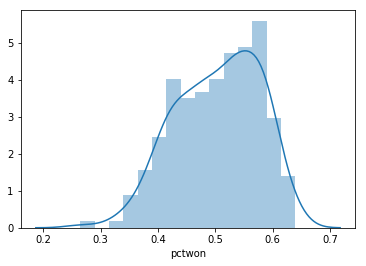

In [109]:
sns.distplot(df_master['pctwon'],bins=15)

## Pair Plots and Correlation

### Batting Basic Stats

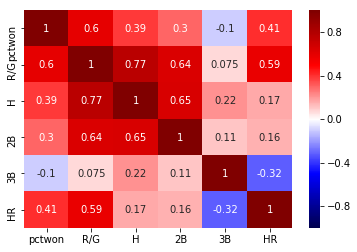

In [110]:
sns.heatmap(df_master[['pctwon','R/G','H','2B','3B','HR']].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

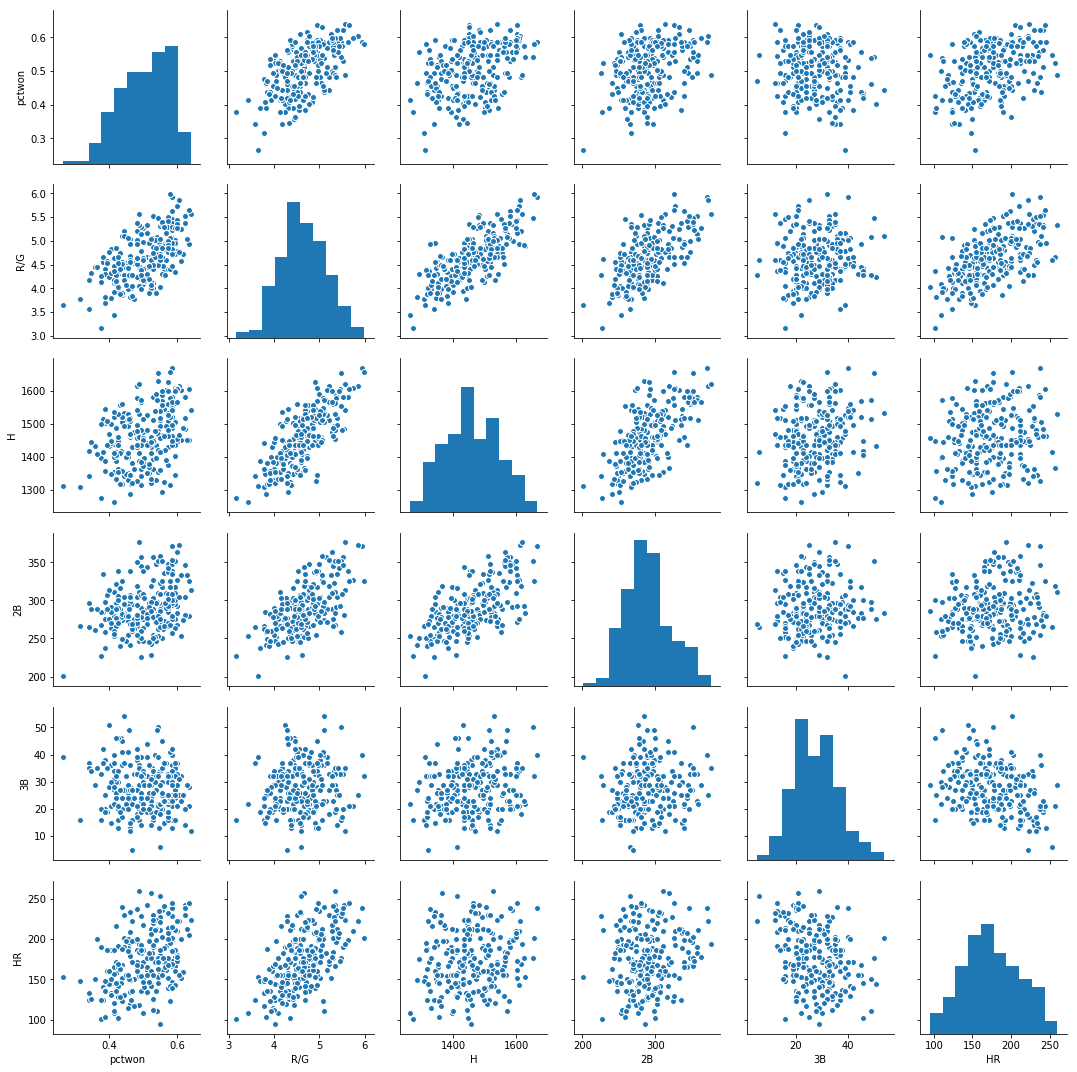

In [111]:
sns.pairplot(df_master,x_vars=['pctwon','R/G','H','2B','3B','HR'],
             y_vars=['pctwon','R/G','H','2B','3B','HR'])

### More Batting

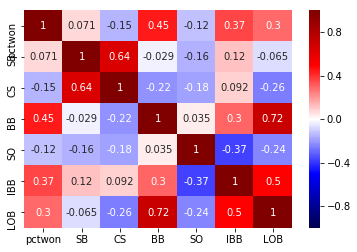

In [112]:
sns.heatmap(df_master[['pctwon','SB','CS','BB','SO','IBB','LOB']].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

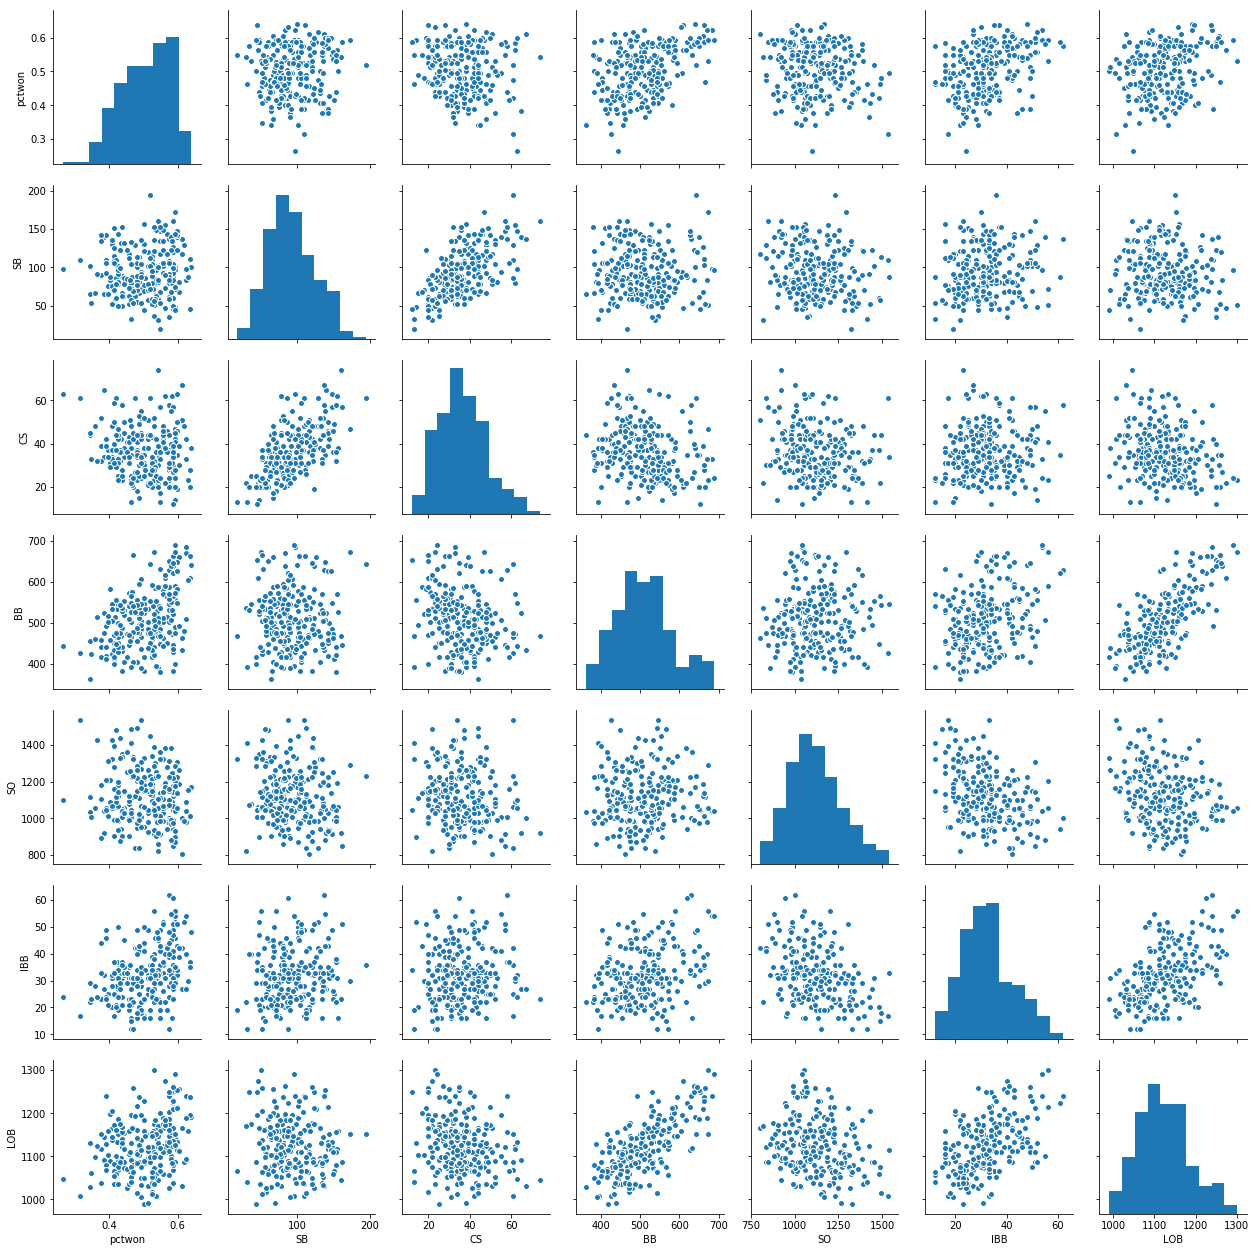

In [113]:
sns.pairplot(df_master,x_vars=['pctwon','SB','CS','BB','SO','IBB','LOB'],
             y_vars=['pctwon','SB','CS','BB','SO','IBB','LOB']) 

### Batting Summaries

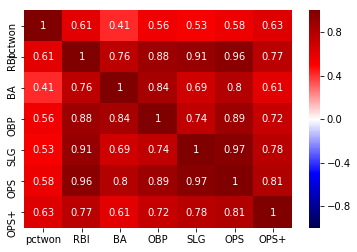

In [114]:
sns.heatmap(df_master[['pctwon','RBI','BA','OBP','SLG','OPS','OPS+']].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

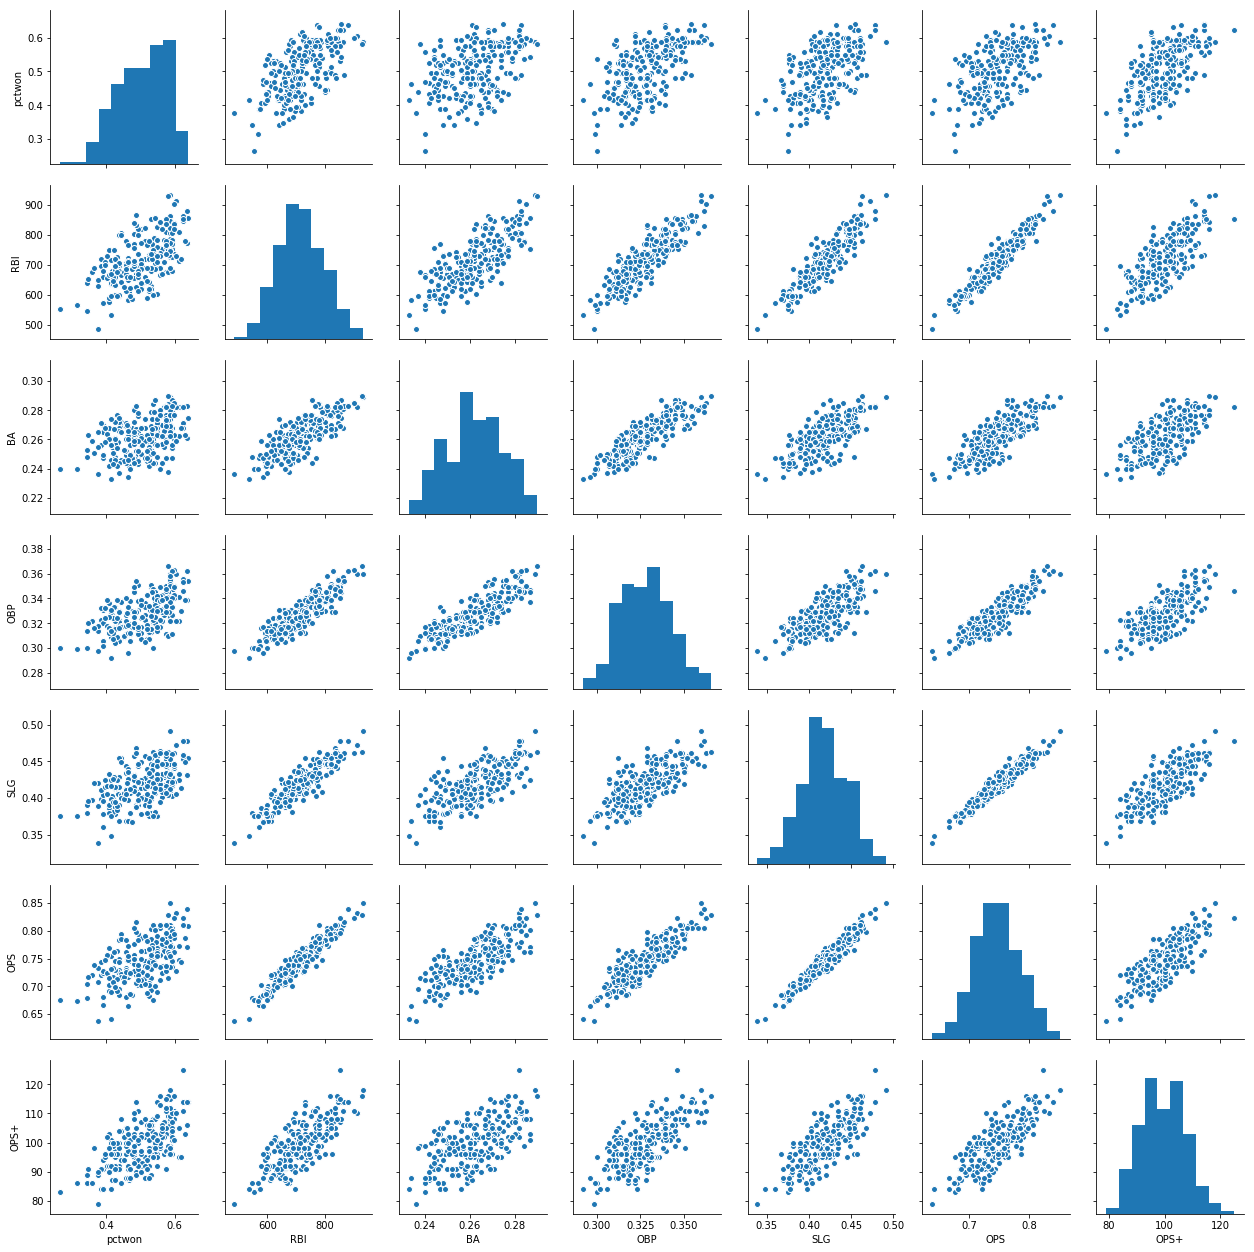

In [115]:
sns.pairplot(df_master,x_vars=['pctwon','RBI','BA','OBP','SLG','OPS','OPS+'],
             y_vars=['pctwon','RBI','BA','OBP','SLG','OPS','OPS+']) 

### Batting Play Types

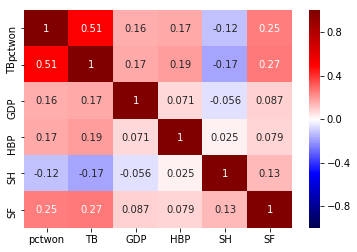

In [116]:
sns.heatmap(df_master[['pctwon','TB','GDP','HBP','SH','SF']].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

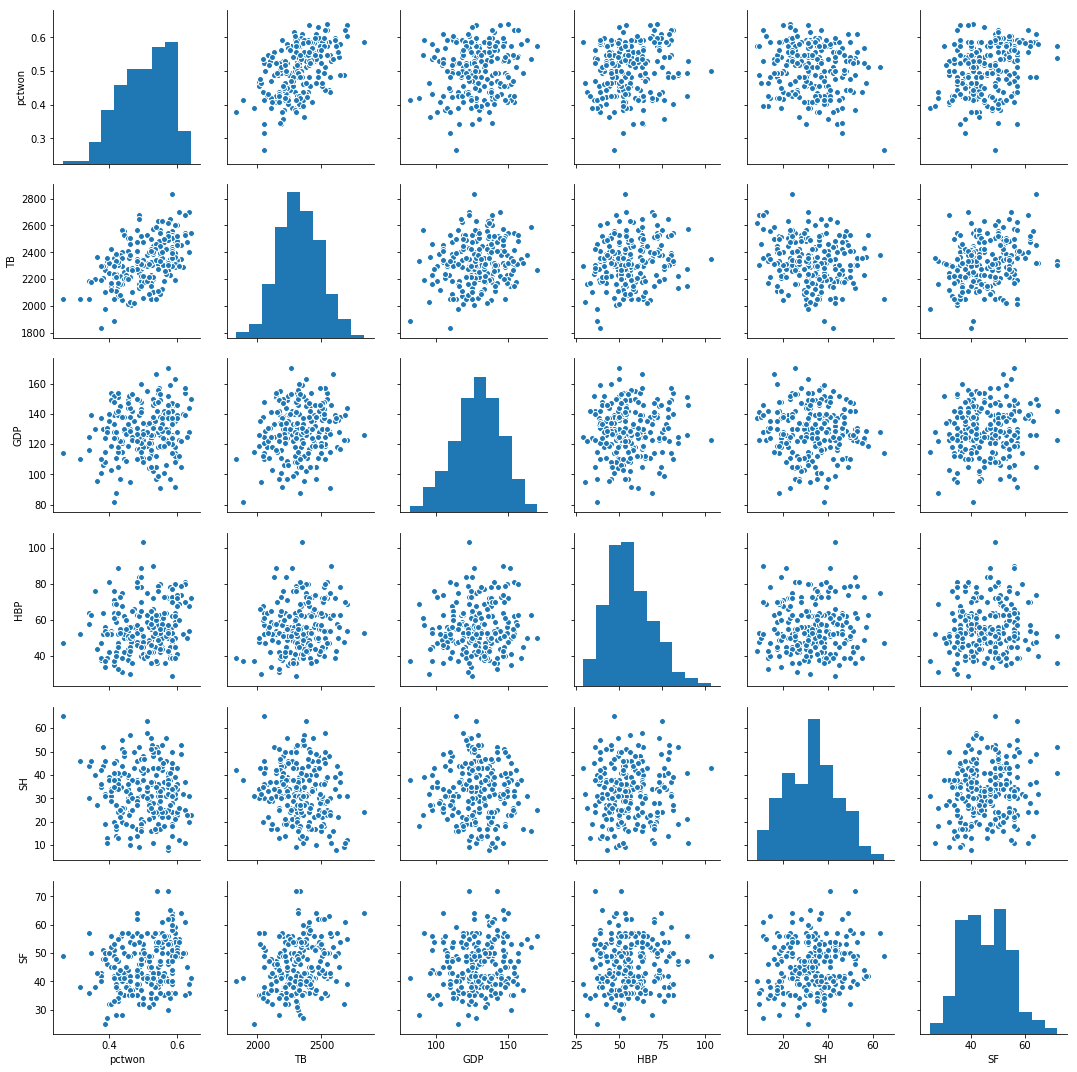

In [117]:
sns.pairplot(df_master,x_vars=['pctwon','TB','GDP','HBP','SH','SF'],
             y_vars=['pctwon','TB','GDP','HBP','SH','SF'])

### Pitching Summary

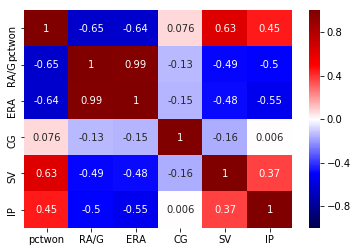

In [118]:
sns.heatmap(df_master[['pctwon','RA/G','ERA','CG','SV','IP']].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

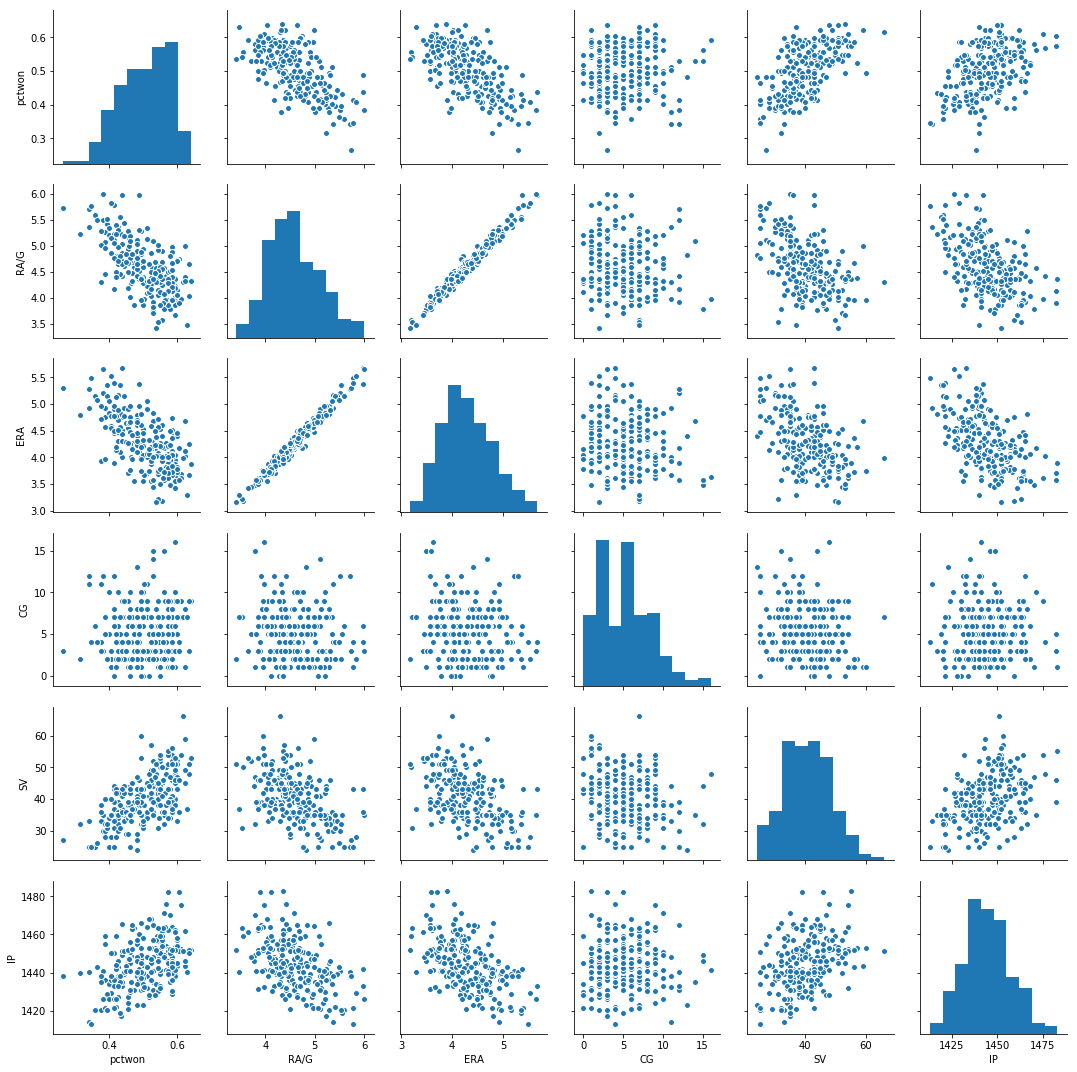

In [119]:
sns.pairplot(df_master,x_vars=['pctwon','RA/G','ERA','CG','SV','IP'],
             y_vars=['pctwon','RA/G','ERA','CG','SV','IP'])

### Pitching Summary 2

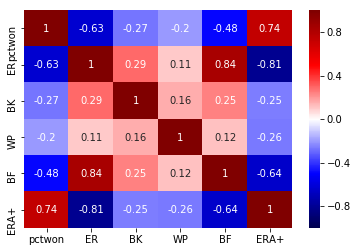

In [120]:
sns.heatmap(df_master[['pctwon','ER','BK','WP','BF','ERA+']].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

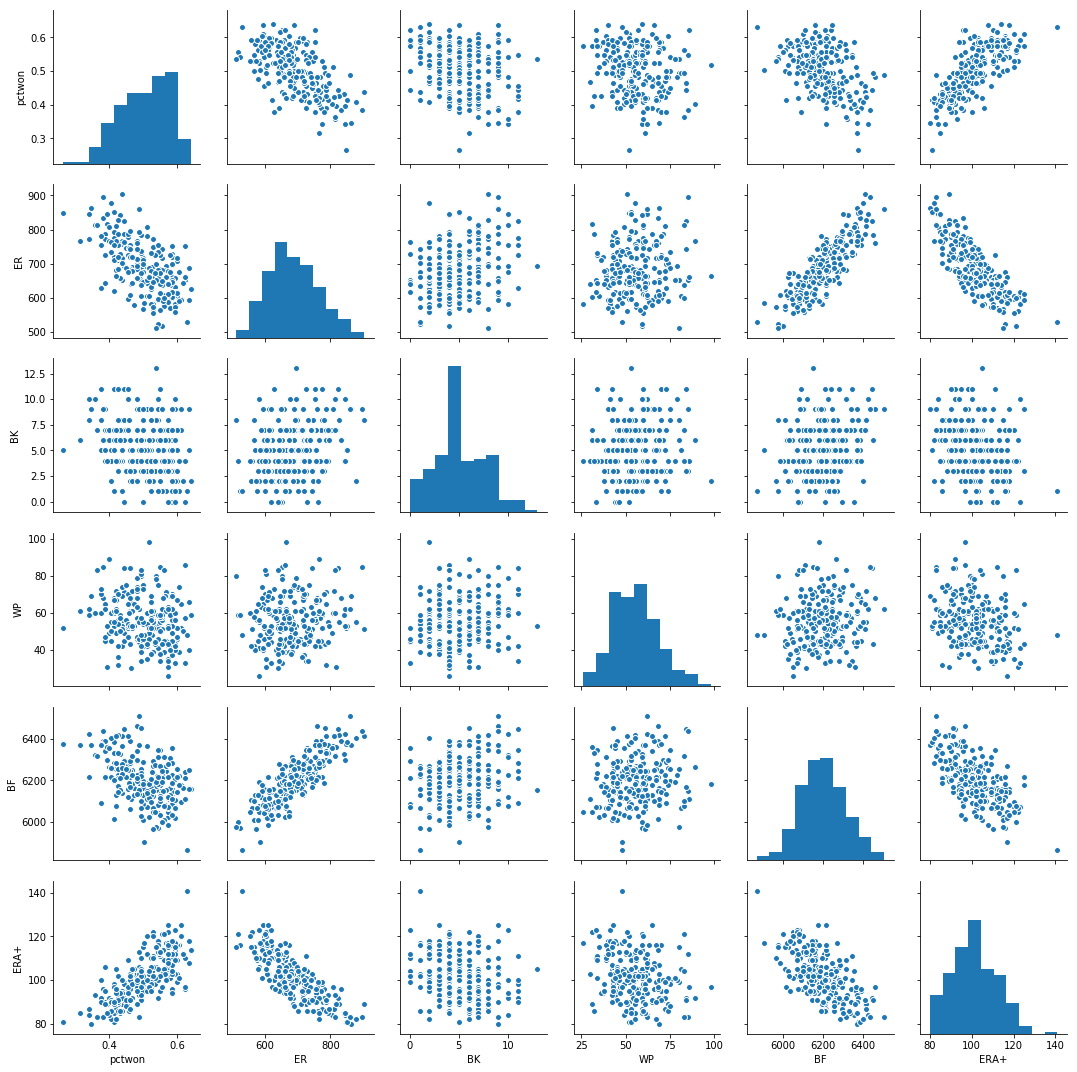

In [121]:
sns.pairplot(df_master,x_vars=['pctwon','ER','BK','WP','BF','ERA+'],
             y_vars=['pctwon','ER','BK','WP','BF','ERA+'])

### Pitching Ratios

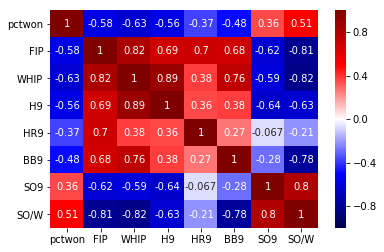

In [122]:
sns.heatmap(df_master[['pctwon','FIP','WHIP','H9','HR9','BB9','SO9','SO/W']].corr(),\
            vmin=-1, vmax=1, cmap='seismic', annot=True)

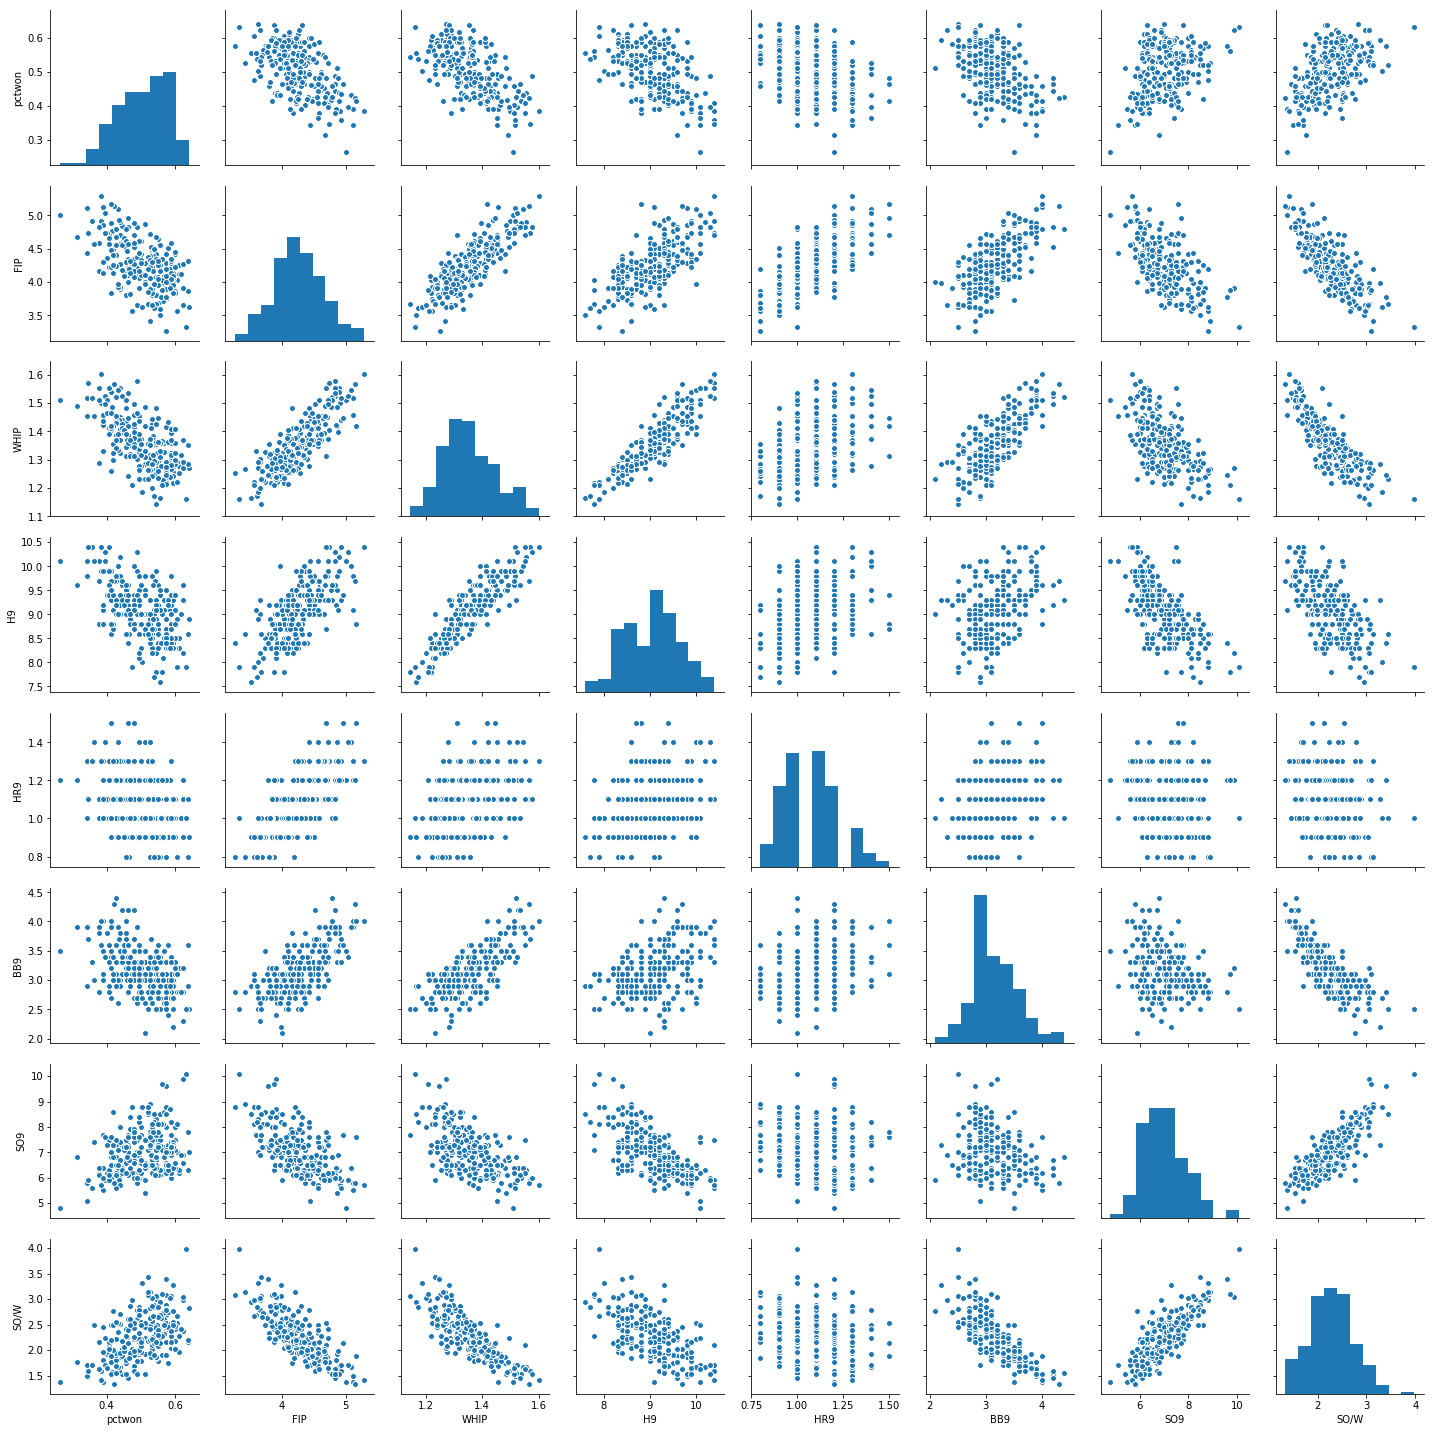

In [123]:
sns.pairplot(df_master,x_vars=['pctwon','FIP','WHIP','H9','HR9','BB9','SO9','SO/W'],
             y_vars=['pctwon','FIP','WHIP','H9','HR9','BB9','SO9','SO/W'])

### Fielding

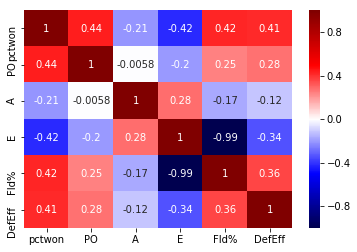

In [124]:
sns.heatmap(df_master[['pctwon','PO','A','E','Fld%','DefEff']].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

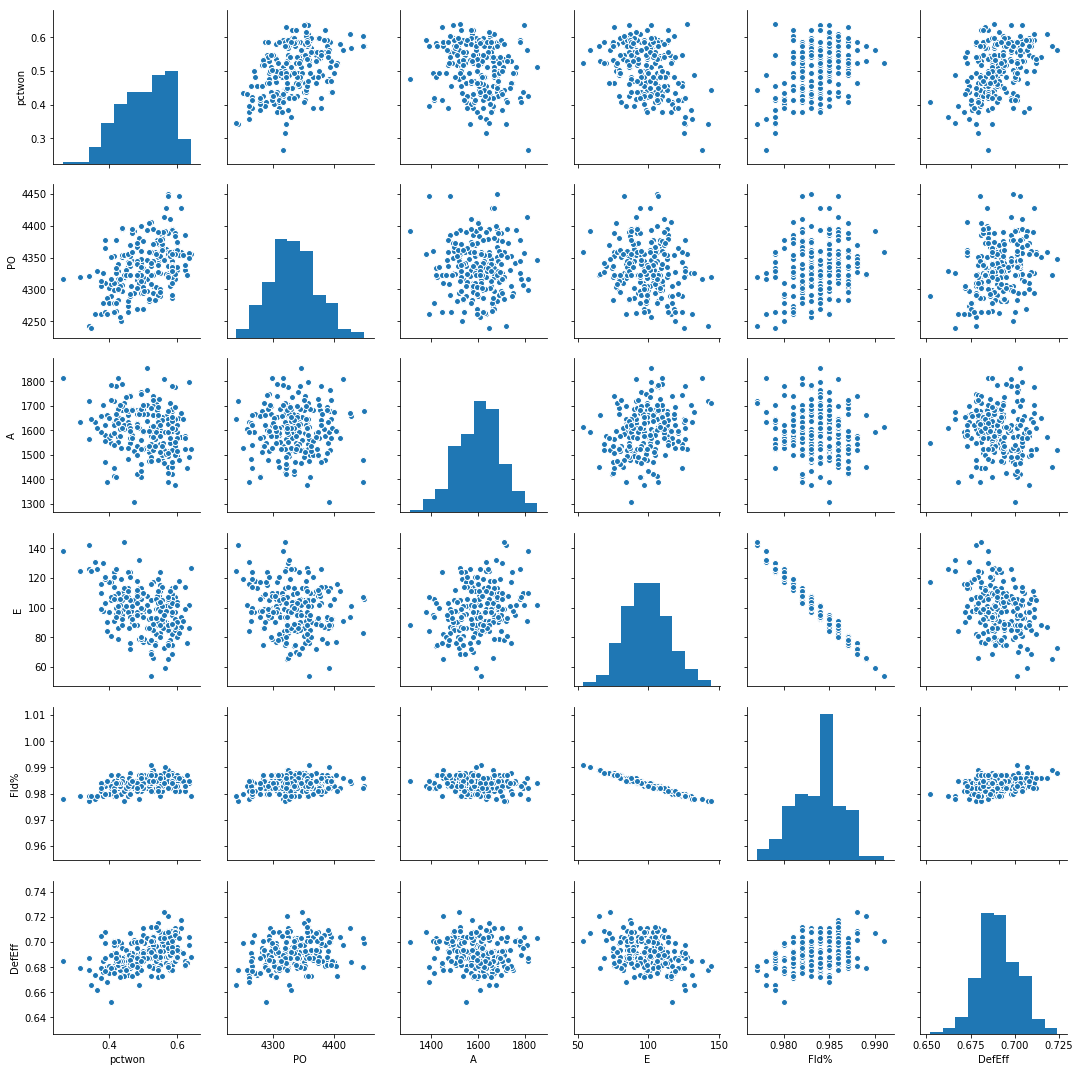

In [125]:
sns.pairplot(df_master,x_vars=['pctwon','PO','A','E','Fld%','DefEff'],
             y_vars=['pctwon','PO','A','E','Fld%','DefEff'])

### Payroll

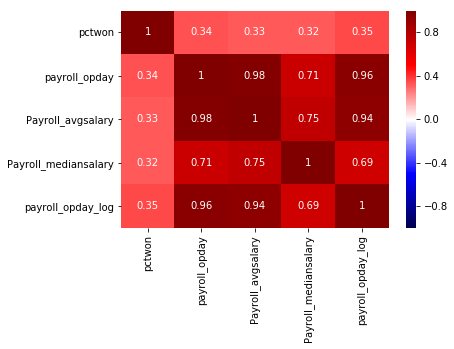

In [126]:
sns.heatmap(df_master[['pctwon','payroll_opday','Payroll_avgsalary','Payroll_mediansalary','payroll_opday_log'
                      ]].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

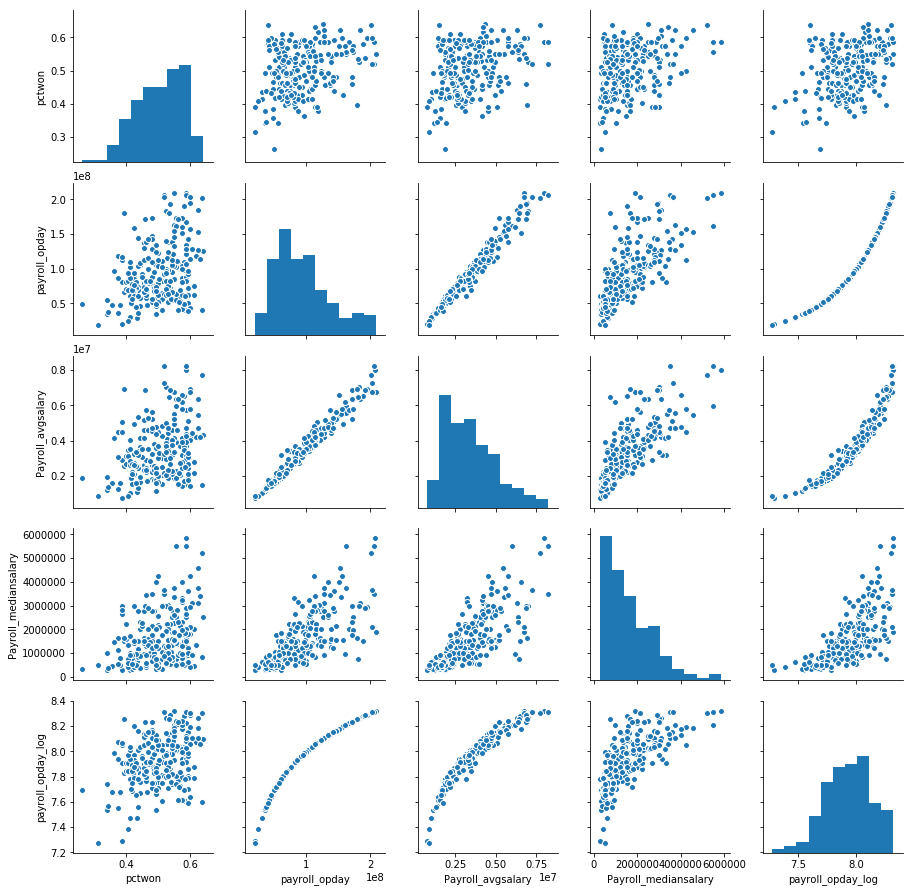

In [127]:
sns.pairplot(df_master,x_vars=['pctwon','payroll_opday','Payroll_avgsalary','Payroll_mediansalary','payroll_opday_log'],
             y_vars=['pctwon','payroll_opday','Payroll_avgsalary','Payroll_mediansalary','payroll_opday_log'])

### Manager Tenure

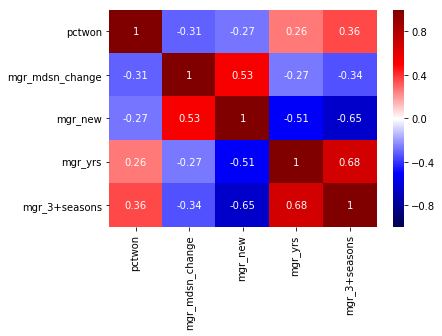

In [128]:
sns.heatmap(df_master[['pctwon','mgr_mdsn_change','mgr_new','mgr_yrs','mgr_3+seasons'
                      ]].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

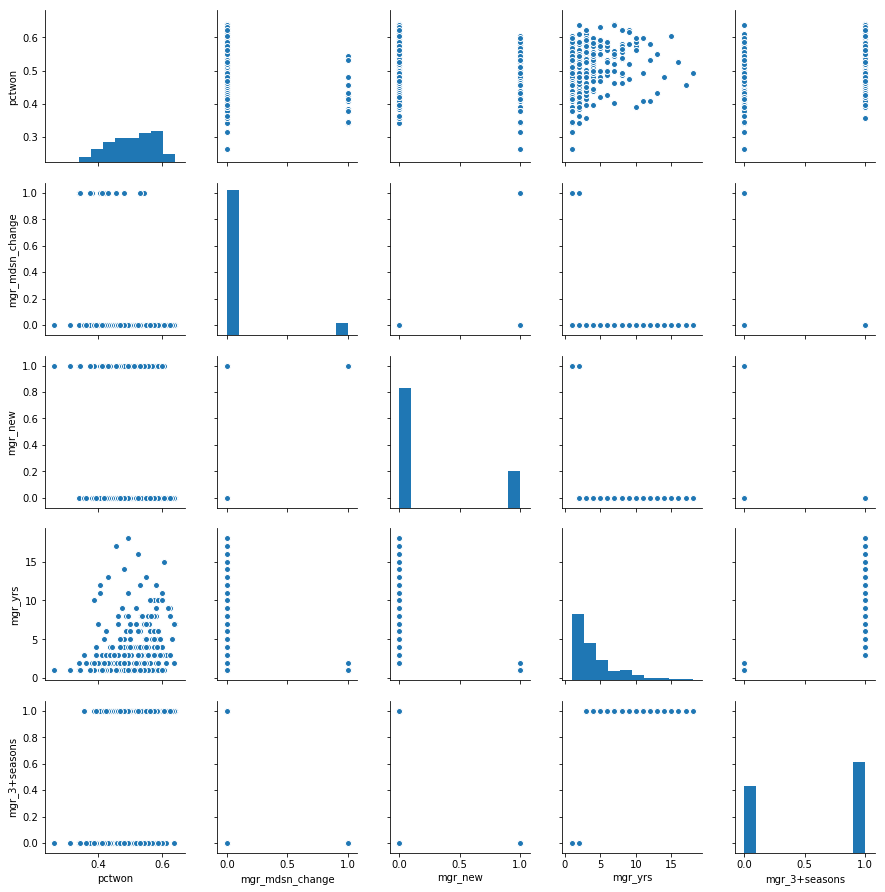

In [129]:
sns.pairplot(df_master,x_vars=['pctwon','mgr_mdsn_change','mgr_new','mgr_yrs','mgr_3+seasons'],
             y_vars=['pctwon','mgr_mdsn_change','mgr_new','mgr_yrs','mgr_3+seasons'])

### "Mariners Curse"?

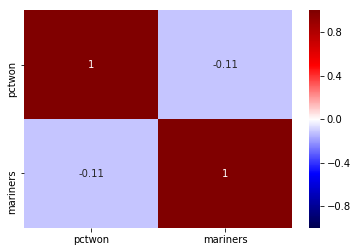

In [130]:
sns.heatmap(df_master[['pctwon','mariners']].corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)

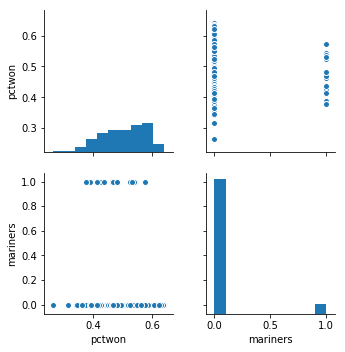

In [131]:
sns.pairplot(df_master,x_vars=['pctwon','mariners'],y_vars=['pctwon','mariners'])

## Scatterplots

/Users/kellyjones/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


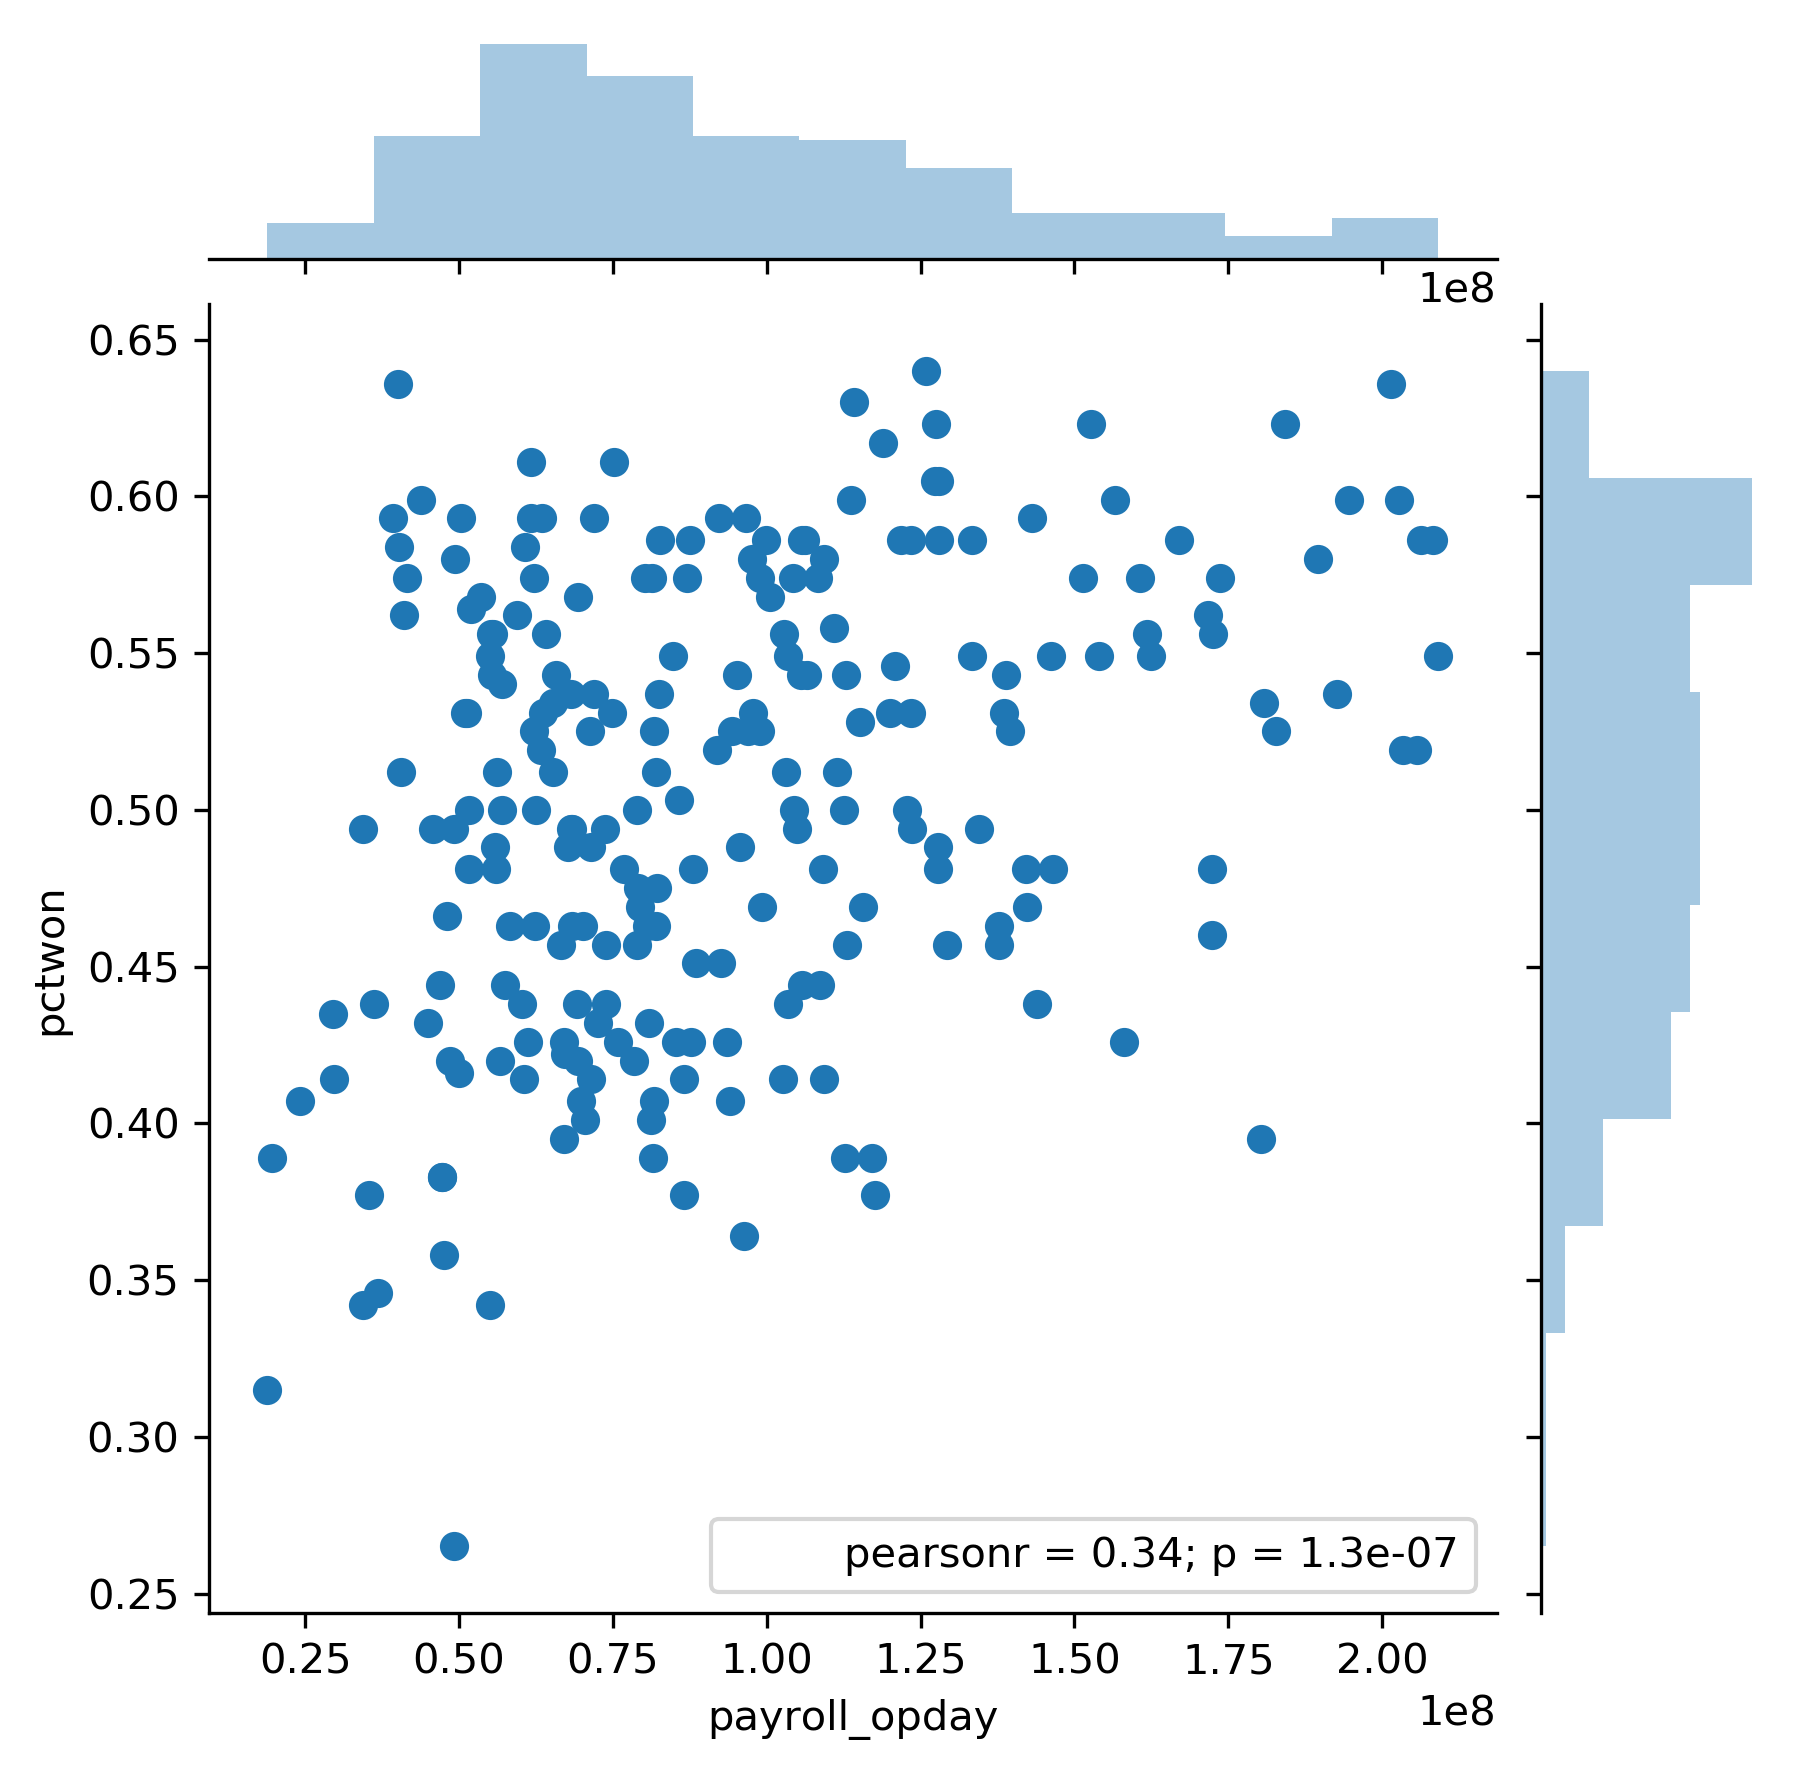

In [137]:
sns.jointplot(x='payroll_opday', y='pctwon', data=df_master, kind='scatter')

In [158]:
import matplotlib.ticker as mtick

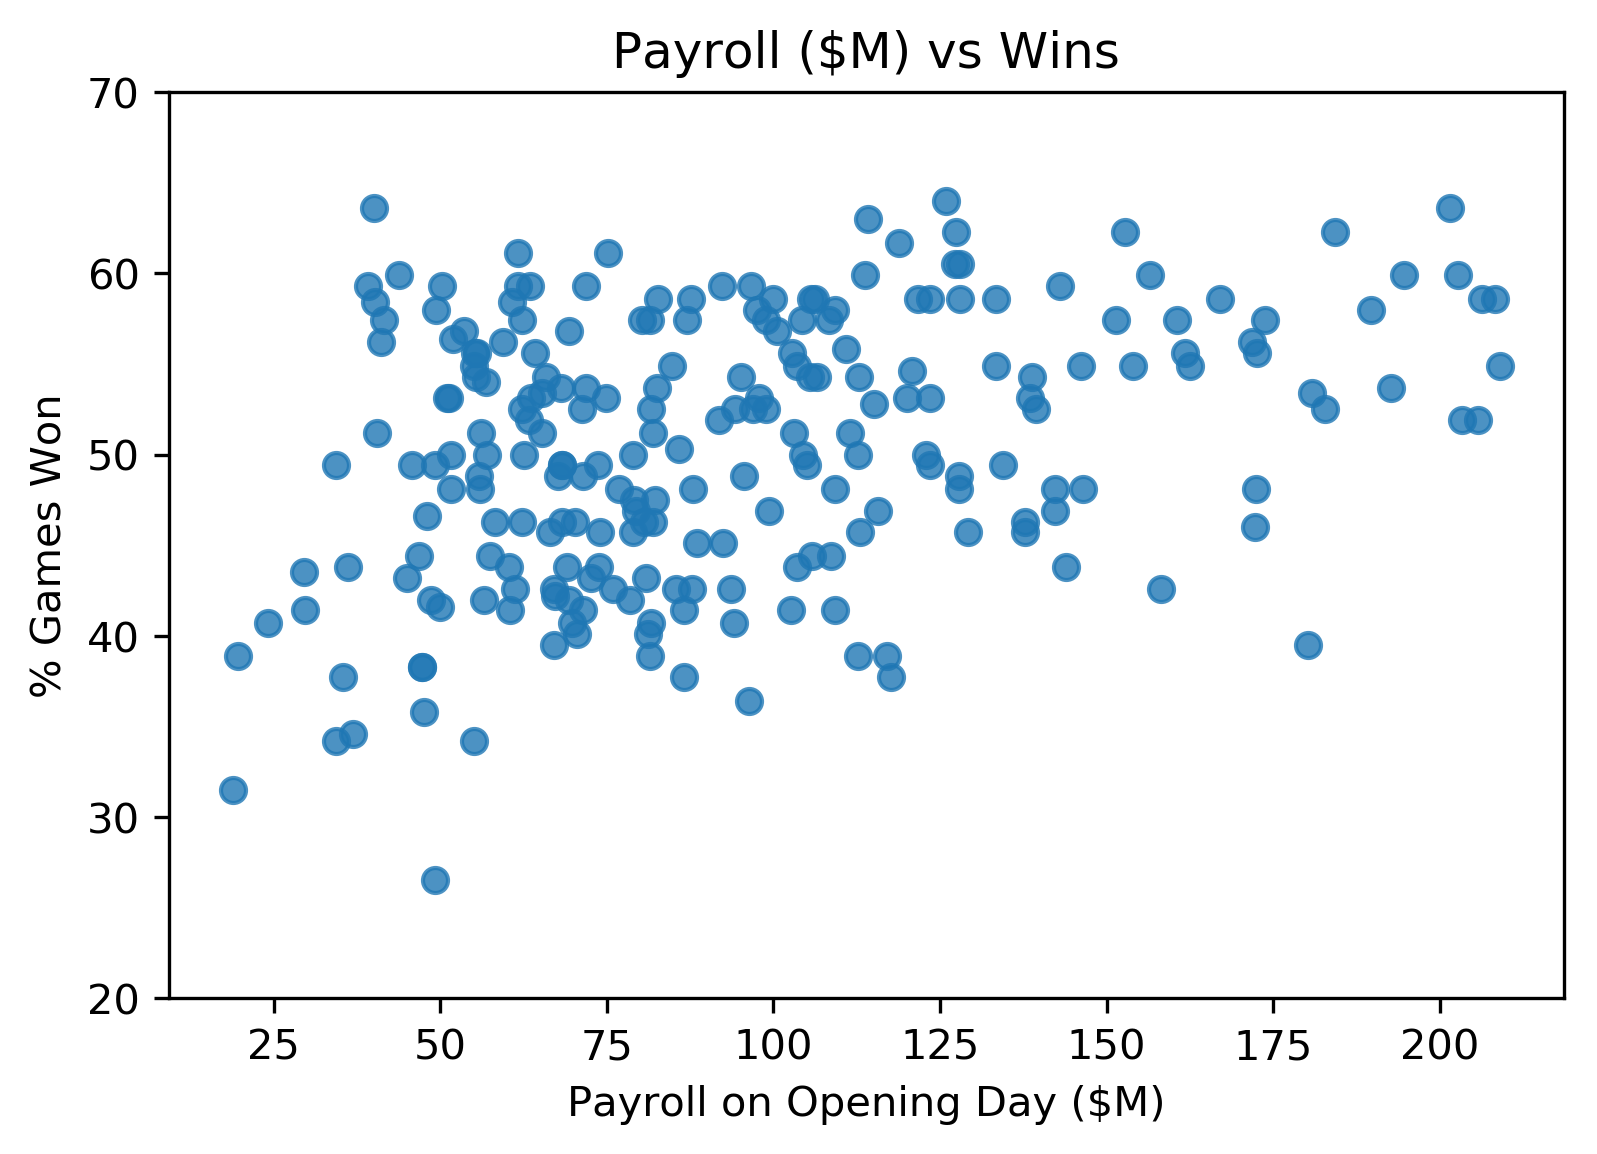

In [203]:
x = df_master['payroll_opday']/1e6
y = df_master['pctwon']*1e2
sns.regplot(x, y, scatter=True, fit_reg=False)
#fig = df_master.plot(kind='scatter', x='payroll_opday', y='pctwon', title='Payroll ($M) vs Wins')
plt.title('Payroll ($M) vs Wins')
plt.xlabel('Payroll on Opening Day ($M)')
plt.ylabel('% Games Won')
plt.yticks([20,30,40,50,60,70])

plt.savefig('figures/wins_vs_payroll.svg')
plt.savefig('figures/wins_vs_payroll.png', dpi=300)

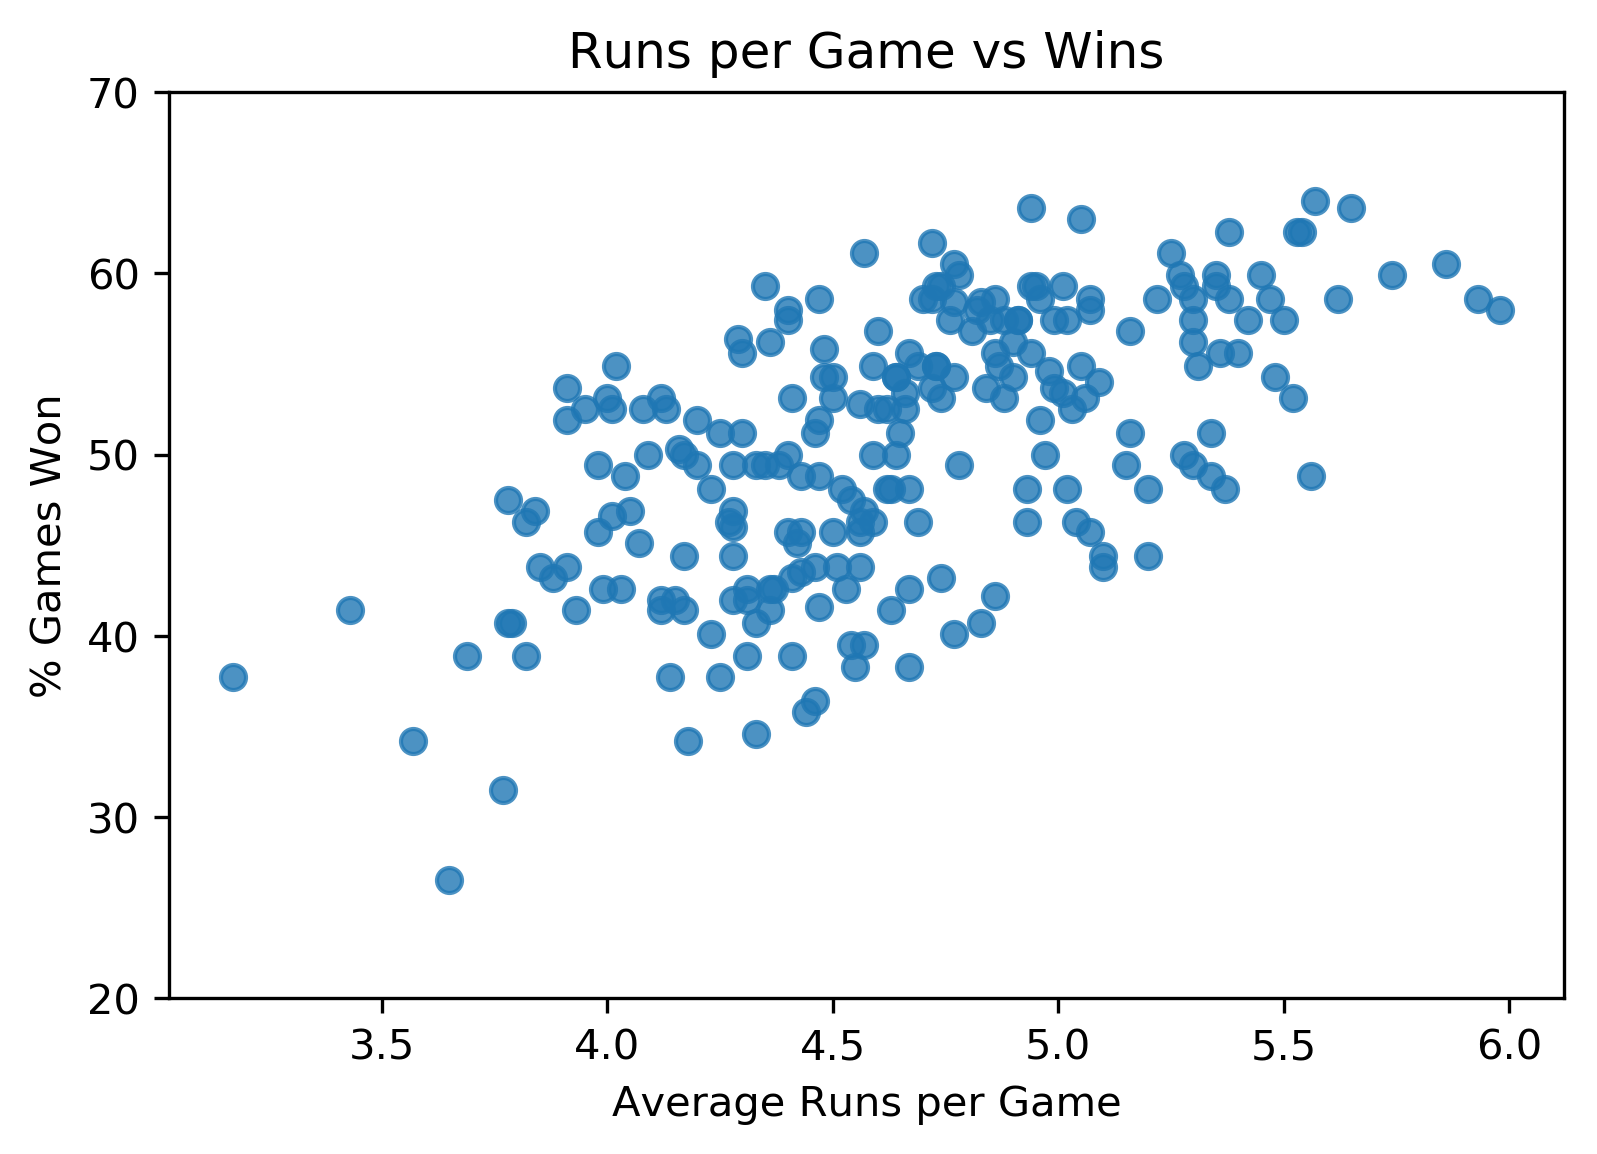

In [204]:
x = df_master['R/G']
y = df_master['pctwon']*1e2
sns.regplot(x, y, scatter=True, fit_reg=False)
#fig = df_master.plot(kind='scatter', x='payroll_opday', y='pctwon', title='Payroll ($M) vs Wins')
plt.title('Runs per Game vs Wins')
plt.xlabel('Average Runs per Game')
plt.ylabel('% Games Won')
plt.yticks([20,30,40,50,60,70])

plt.savefig('figures/wins_vs_runspergame.svg')
plt.savefig('figures/wins_vs_runspergame.png', dpi=300)

# df_master.plot(kind='scatter', x='OPS', y='pctwon', title='Runs per Game vs Wins') # OLD GRAPH

## Dropping Variables Before Modeling

There's a lot of collinearity among my variables - sometimes perfect collinearity - so I'll be dropping variables based on outputs above and to reduce duplication.

In [427]:
# Keep most variables in first iteration
df_keep1 = df_master.drop(columns=['#Bat','BatAge','G','PA','AB','R','BA','TB','Team',
                                   'Year','#P','PAge','W','L','GS','GF','CG','tSho','cSho',
                                   'IP','BF','FIP','#Fld','Ch','DP','Inn','Rdrs','Rdrs/yr',
                                   'Rtot','Rtot/yr','Payroll_avgsalary','Payroll_mediansalary',
                                   'rank','mgr_yrs'])

In [428]:
df_keep1.head()

R/G     H   2B  3B   HR  RBI   SB  CS   BB    SO      ...        \
YrTm                                                            ...         
2002BAL  4.12  1353  311  27  165  636  110  48  452   993      ...         
2002BOS  5.30  1560  348  33  177  810   80  28  545   944      ...         
2002CHW  5.28  1475  289  29  217  819   75  31  555   952      ...         
2002CLE  4.56  1349  255  26  192  706   52  37  542  1000      ...         
2002DET  3.57  1340  265  37  124  546   65  44  363  1035      ...         

         DefEff    E   Fld%    PO  mariners  payroll_opday  payroll_opday_log  \
YrTm                                                                            
2002BAL   0.701   91  0.985  4352         0       60493487           7.781709   
2002BOS   0.702  104  0.983  4338         0      108366060           8.034893   
2002CHW   0.706   97  0.984  4269         0       57052833           7.756277   
2002CLE   0.674  113  0.981  4274         0       78909449           7.897129   
2002DET   0.678  142  0.977  4242         0       55048000           7.740742   

         mgr_mdsn_change  mgr_new  mgr_3+seasons  
YrTm                                              
2002BAL                0        0              1  
2002BOS                0        1              0  
2002CHW                0        0              1  
2002CLE                1        1              0  
2002DET                1        1              0  

[5 rows x 45 columns]

In [429]:
df_keep1.columns

Index(['R/G', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'OBP',
       'SLG', 'OPS', 'OPS+', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'RA/G',
       'pctwon', 'ERA', 'SV', 'ER', 'BK', 'WP', 'ERA+', 'WHIP', 'H9', 'HR9',
       'BB9', 'SO9', 'SO/W', 'A', 'DefEff', 'E', 'Fld%', 'PO', 'mariners',
       'payroll_opday', 'payroll_opday_log', 'mgr_mdsn_change', 'mgr_new',
       'mgr_3+seasons'],
      dtype='object')

In [459]:
# Further reduce by dropping summary statistics that have no strategic value
# Ex: "If you score more runs, you win more games." Obviously.
df_keep2 = df_keep1.drop(columns=['R/G','RBI','OBP','SLG','OPS','OPS+','RA/G','ERA','SV',
                                  'ER','ERA+','payroll_opday','mgr_mdsn_change','mgr_new'])

In [460]:
df_keep2.head()

H   2B  3B   HR   SB  CS   BB    SO  GDP  HBP      ...        SO9  \
YrTm                                                           ...              
2002BAL  1353  311  27  165  110  48  452   993  128   64      ...        6.0   
2002BOS  1560  348  33  177   80  28  545   944  139   72      ...        7.2   
2002CHW  1475  289  29  217   75  31  555   952  111   49      ...        6.0   
2002CLE  1349  255  26  192   52  37  542  1000  149   56      ...        6.7   
2002DET  1340  265  37  124   65  44  363  1035  125   64      ...        5.1   

         SO/W     A  DefEff    E   Fld%    PO  mariners  payroll_opday_log  \
YrTm                                                                         
2002BAL  1.76  1720   0.701   91  0.985  4352         0           7.781709   
2002BOS  2.69  1645   0.702  104  0.983  4338         0           8.034893   
2002CHW  1.79  1595   0.706   97  0.984  4269         0           7.756277   
2002CLE  1.75  1662   0.674  113  0.981  4274         0           7.897129   
2002DET  1.71  1719   0.678  142  0.977  4242         0           7.740742   

         mgr_3+seasons  
YrTm                    
2002BAL              1  
2002BOS              0  
2002CHW              1  
2002CLE              0  
2002DET              0  

[5 rows x 31 columns]

# Regression - Ex of a Clear but Useless Model

It is easy to get a model with a high R-Squared value that tells us basically nothing. See below for examples.

## Useless Model 1

In [300]:
X = df_keep1[['R/G','RA/G']] # runs per game and runs against per game
y = df_keep1['pctwon']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [302]:
model = sm.OLS(y_train, sm.add_constant(X_train))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pctwon   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     505.9
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           3.64e-69
Time:                        22:10:15   Log-Likelihood:                 351.94
No. Observations:                 160   AIC:                            -697.9
Df Residuals:                     157   BIC:                            -688.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5204      0.027     19.501      0.000       0.468       0.573
R/G            0.0940      0.004     22.264      0.000       0.086       0.102
RA/G          -0.0985      0.004    -23.808      0.000      -0.107      -0.090
==============================================================================
Omnibus:                        0.748   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.554
Skew:                           0.141   Prob(JB):                        0.758
Kurtosis:                       3.058   Cond. No.                         83.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# performance on test data and train data
model = LinearRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
overall_score = model.score(X,y)

print('Train score: ',train_score)
print('Test score: ',test_score)
print('Overall score: ',overall_score)

Train score:  0.865669790395489
Test score:  0.8525477869099063
Overall score:  0.8633866889292094


In [318]:
# 3-fold cross-validation - 229 rows / 3 = 76, so can have 7 features for 10x rule
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=3, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[0.00044826 0.00038133 0.00054339]


## Useless Model 2

In [305]:
X = df_keep1[['RBI','ERA','SV','Fld%']]
y = df_keep1['pctwon']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [307]:
model = sm.OLS(y_train, sm.add_constant(X_train))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pctwon   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     495.1
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           3.78e-87
Time:                        22:19:37   Log-Likelihood:                 398.21
No. Observations:                 160   AIC:                            -786.4
Df Residuals:                     155   BIC:                            -771.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9860      0.661     -3.005      0.003      -3.291      -0.680
RBI            0.0005   2.14e-05     24.941      0.000       0.000       0.001
ERA           -0.0762      0.004    -20.908      0.000      -0.083      -0.069
SV             0.0029      0.000     11.483      0.000       0.002       0.003
Fld%           2.3552      0.671      3.508      0.001       1.029       3.682
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.795
Skew:                          -0.056   Prob(JB):                        0.408
Kurtosis:                       2.493   Cond. No.                     4.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
# performance on test data and train data
model = LinearRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
overall_score = model.score(X,y)

print('Train score: ',train_score)
print('Test score: ',test_score)
print('Overall score: ',overall_score)

Train score:  0.9274157585832308
Test score:  0.8758794436022082
Overall score:  0.9141511883403182


In [319]:
# 3-fold cross-validation - 229 rows / 3 = 76, so can have 7 features for 10x rule
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=3, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[0.00044826 0.00038133 0.00054339]


Again, really nice model fit but really useless.

# Regression - A Better Model

Instead of the approach above, where high model fit is driven by outcomes that are highly correlated with the dependent variable and difficult to control, we should look for features that a team might act on.

The dataframe used in this section is df_keep2, which dropped many of the summary measures like `RBI` or `R/A` that are not as actionable.

## Test-train split on plain regression

In [461]:
y = df_keep2['pctwon']
X = df_keep2.drop(['pctwon'],1)

In [462]:
df_keep2.columns

Index(['H', '2B', '3B', 'HR', 'SB', 'CS', 'BB', 'SO', 'GDP', 'HBP', 'SH', 'SF',
       'IBB', 'LOB', 'pctwon', 'BK', 'WP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9',
       'SO/W', 'A', 'DefEff', 'E', 'Fld%', 'PO', 'mariners',
       'payroll_opday_log', 'mgr_3+seasons'],
      dtype='object')

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [464]:
model = LinearRegression()
model.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

print('Train score: ',train_score)
print('Test score: ',test_score)

Train score:  0.8862730464795134
Test score:  0.8272775382399989


In [465]:
model = sm.OLS(y_train, sm.add_constant(X_train))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pctwon   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     33.51
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           2.72e-47
Time:                        08:45:29   Log-Likelihood:                 363.64
No. Observations:                 160   AIC:                            -665.3
Df Residuals:                     129   BIC:                            -570.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0315      8.190      1.103      0.272      -7.173      25.236
H                     0.0005   7.63e-05      6.904      0.000       0.000       0.001
2B                   -0.0003      0.000     -2.100      0.038      -0.001   -1.54e-05
3B                   -0.0001      0.000     -0.318      0.751      -0.001       0.001
HR                    0.0003      0.000      1.896      0.060   -1.21e-05       0.001
SB                    0.0002      0.000      1.731      0.086   -2.79e-05       0.000
CS                   -0.0009      0.000     -2.752      0.007      -0.002      -0.000
BB                    0.0004      9e-05      4.794      0.000       0.000       0.001
SO                -2.542e-05   2.55e-05     -0.997      0.321   -7.59e-05     2.5e-05
GDP                  -0.0004      0.000     -1.801      0.074      -0.001    3.81e-05
HBP                   0.0009      0.000      4.464      0.000       0.000       0.001
SH                 2.697e-05      0.000      0.101      0.920      -0.001       0.001
SF                   -0.0003      0.000     -0.790      0.431      -0.001       0.000
IBB                   0.0001      0.000      0.423      0.673      -0.001       0.001
LOB                  -0.0005      0.000     -4.305      0.000      -0.001      -0.000
BK                    0.0005      0.001      0.484      0.629      -0.001       0.002
WP                   -0.0002      0.000     -0.865      0.389      -0.001       0.000
WHIP                 -0.0260      0.634     -0.041      0.967      -1.280       1.228
H9                   -0.0768      0.064     -1.207      0.230      -0.203       0.049
HR9                  -0.0693      0.041     -1.706      0.090      -0.150       0.011
BB9                  -0.0687      0.069     -0.990      0.324      -0.206       0.069
SO9                  -0.0059      0.022     -0.268      0.789      -0.050       0.038
SO/W                 -0.0455      0.035     -1.288      0.200      -0.115       0.024
A                 -3.636e-05   4.31e-05     -0.844      0.400      -0.000    4.88e-05
DefEff               -1.5615      1.584     -0.986      0.326      -4.696       1.573
E                    -0.0020      0.001     -1.459      0.147      -0.005       0.001
Fld%                 -7.3996      8.340     -0.887      0.377     -23.901       9.102
PO                    0.0002   7.67e-05      2.755      0.007    5.95e-05       0.000
mariners             -0.0177      0.011     -1.689      0.094      -0.039       0.003
payroll_opday_log    -0.0020      0.015     -0.135      0.892      -0.031       0.027
mgr_3+seasons         0.0053      0.006      0.916      0.361      -0.006       0.017
==============================================================================
Omnibus:                        3.983   Durbin-Watson:                   2.127
P

## cross_val_score

Scored with MSE

In [466]:
# 3-fold cross-validation - 229 rows / 3 = 76, so can have 7 features for 10x rule
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=3, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[0.0011989  0.00083724 0.00104647]


Default scoring

In [467]:
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=3) # try with default scoring

print(scores)

[0.83354519 0.81519007 0.74082259]


In [468]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) # still default scoring

Accuracy: 0.80 (+/- 0.08)


## Polynomial degree 2

In [469]:
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
est.fit(X_train, y_train)
train_error = mean_squared_error(y_train, est.predict(X_train))
test_error = mean_squared_error(y_test, est.predict(X_test))

In [470]:
print('Train error: ',train_error)
print('Test error: ',test_error)

Train error:  1.3609649433630512e-28
Test error:  0.007339031537227164


## Elastic Net

In [471]:
model = ElasticNet(1.0, l1_ratio = 0.5) # ratio splits equally between L1 (lasso) and L2 (ridge)
model.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [472]:
model = ElasticNet(1.0, l1_ratio = 0.2) # ratio heavier on Ridge - to address collinearity
model.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## Elastic Net CV

**Straight Linear Regression - Degree 1**  
Find based on l1 ratio of .01 that it is using almost all Ridge (L2) rather than Lasso (L1)

In [473]:
degree = 1
l1rats = [.01, .05, .1, .15, .2, .3, .4, .5, .7, .9, .95, 1] # leaning toward heavier L2 weights b/c multicollin
#λ = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV(l1_ratio=l1rats))
est.fit(X,y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('elasticnetcv', ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 0.95, 1],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

In [474]:
print("alpha =", est.named_steps.elasticnetcv.alpha_, "l1_ratio =",est.named_steps.elasticnetcv.l1_ratio_)

alpha = 0.002401391849888445 l1_ratio = 1.0


In [475]:
est.steps[0][1]

PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)

In [476]:
df_betas1 = pd.DataFrame()
poly = est.steps[0][1]
df_betas1['feature'] = poly.get_feature_names(X.columns)
df_betas1['coefficient'] = est.steps[-1][1].coef_.ravel()
df_betas1.sort_values('coefficient')

feature  coefficient
18                 H9    -0.039052
20                BB9    -0.022380
6                  CS    -0.001229
25                  E    -0.000704
15                 BK    -0.000673
14                LOB    -0.000624
9                 GDP    -0.000399
16                 WP    -0.000216
3                  3B    -0.000191
2                  2B    -0.000167
8                  SO    -0.000039
23                  A    -0.000032
24             DefEff     0.000000
22               SO/W     0.000000
21                SO9     0.000000
28           mariners    -0.000000
19                HR9    -0.000000
26               Fld%    -0.000000
0                   1     0.000000
29  payroll_opday_log     0.000000
17               WHIP    -0.000000
30      mgr_3+seasons     0.000000
11                 SH     0.000035
4                  HR     0.000080
12                 SF     0.000141
5                  SB     0.000173
27                 PO     0.000328
1                   H     0.000494
7                  BB     0.000528
10                HBP     0.000720
13                IBB     0.000823

In [477]:
# Here's what's left after the zeroes are removed
df_betas1[df_betas1['coefficient'] != 0]

feature  coefficient
1        H     0.000494
2       2B    -0.000167
3       3B    -0.000191
4       HR     0.000080
5       SB     0.000173
6       CS    -0.001229
7       BB     0.000528
8       SO    -0.000039
9      GDP    -0.000399
10     HBP     0.000720
11      SH     0.000035
12      SF     0.000141
13     IBB     0.000823
14     LOB    -0.000624
15      BK    -0.000673
16      WP    -0.000216
18      H9    -0.039052
20     BB9    -0.022380
23       A    -0.000032
25       E    -0.000704
27      PO     0.000328

**Polynomial - Degree 2**

In [479]:
degree = 2
l1ratios = [.05, .1, .15, .2, .3, .4, .5, .7, .9, .95, .99, 1]
#λ = [1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV(l1_ratio=l1ratios))
est.fit(X,y)

/Users/kellyjones/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kellyjones/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('elasticnetcv', ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

In [ ]:
df_betas2 = pd.DataFrame()
poly = est.steps[0][1]
df_betas2['feature'] = poly.get_feature_names(X.columns)
df_betas2['coefficient'] = est.steps[-1][1].coef_.ravel()
df_betas2.sort_values('coefficient')

In [423]:
# Here's what's left after the zeroes are removed
df_betas2[df_betas2['coefficient'] != 0]

feature   coefficient
551  payroll_opday^2  1.893898e-18

**Polynomial - Degree 3**

In [424]:
degree = 3
l1ratios = [.05, .1, .15, .2, .3, .4, .5, .7, .9, .95, .99, 1]
#λ = [1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV(l1_ratio=l1ratios))
est.fit(X,y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('elasticnetcv', ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

In [425]:
# Find that basically everything is 0
df_betas3 = pd.DataFrame()
poly = est.steps[0][1]
df_betas3['feature'] = poly.get_feature_names(X.columns)
df_betas3['coefficient'] = est.steps[-1][1].coef_.ravel()
df_betas3.sort_values('coefficient')

feature   coefficient
0                          1  0.000000e+00
4368                HBP WP^2 -0.000000e+00
4367    HBP BK mgr_3+seasons  0.000000e+00
4366          HBP BK mgr_new -0.000000e+00
4365  HBP BK mgr_mdsn_change -0.000000e+00
4364    HBP BK payroll_opday -0.000000e+00
4363         HBP BK mariners -0.000000e+00
4362               HBP BK PO -0.000000e+00
4361             HBP BK Fld% -0.000000e+00
4360                HBP BK E -0.000000e+00
4359           HBP BK DefEff -0.000000e+00
4358                HBP BK A -0.000000e+00
4357             HBP BK SO/W -0.000000e+00
4356              HBP BK SO9 -0.000000e+00
4355              HBP BK BB9 -0.000000e+00
4354              HBP BK HR9 -0.000000e+00
4353               HBP BK H9 -0.000000e+00
4352             HBP BK WHIP -0.000000e+00
4351               HBP BK WP -0.000000e+00
4350                HBP BK^2 -0.000000e+00
4349   HBP LOB mgr_3+seasons  0.000000e+00
4348         HBP LOB mgr_new -0.000000e+00
4369             HBP WP WHIP -0.000000e+00
4370               HBP WP H9 -0.000000e+00
4371              HBP WP HR9 -0.000000e+00
4372              HBP WP BB9 -0.000000e+00
4394           HBP WHIP Fld% -0.000000e+00
4393              HBP WHIP E -0.000000e+00
4392         HBP WHIP DefEff -0.000000e+00
4391              HBP WHIP A -0.000000e+00
...                      ...           ...
2148               HR BB SO9  0.000000e+00
2158           HR BB mgr_new -0.000000e+00
2197              HR GDP SO9  0.000000e+00
2171               HR SO HR9 -0.000000e+00
2173               HR SO SO9  0.000000e+00
2195              HR GDP HR9  0.000000e+00
2194               HR GDP H9  0.000000e+00
2193             HR GDP WHIP  0.000000e+00
2192               HR GDP WP  0.000000e+00
2191               HR GDP BK -0.000000e+00
2190              HR GDP LOB  0.000000e+00
2189              HR GDP IBB  0.000000e+00
2188               HR GDP SF  0.000000e+00
2187               HR GDP SH  0.000000e+00
2186              HR GDP HBP  0.000000e+00
2185                HR GDP^2  0.000000e+00
2184     HR SO mgr_3+seasons  0.000000e+00
2183           HR SO mgr_new -0.000000e+00
2182   HR SO mgr_mdsn_change -0.000000e+00
2181     HR SO payroll_opday  0.000000e+00
2180          HR SO mariners -0.000000e+00
2179                HR SO PO  0.000000e+00
2178              HR SO Fld%  0.000000e+00
2177                 HR SO E -0.000000e+00
2176            HR SO DefEff  0.000000e+00
2175                 HR SO A  0.000000e+00
2174              HR SO SO/W  0.000000e+00
2172               HR SO BB9 -0.000000e+00
6544         mgr_3+seasons^3  0.000000e+00
6525         payroll_opday^3  9.282452e-27

[6545 rows x 2 columns]

In [396]:
# Here's what's left after the zeroes are removed - it's teeny tiny
df_betas3[df_betas3['coefficient'] != 0]

feature   coefficient
6525  payroll_opday^3  9.282452e-27

In [ ]:
# try again but pass it an alpha this time - get warning that it did not converge
degree = 3
l1ratios = [.05, .1, .15, .2, .3, .4, .5, .7, .9, .95, .99, 1]
λ = [1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5]
est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV(l1_ratio=l1ratios,alphas=λ))
est.fit(X,y)